# Participant ID:S07

### Content:
- Correlation matrix 
- Comfort Function implementation
- Weather Station Data (During Commuting)
- Weather Station Data (Day of Commuting from 8am to 6pm)
- Living Lab (Day of Commuting from 8am to 6pm)

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime


In [3]:
## Read the CSV file into a DataFrame
S07_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/process_data/S07_final_df.csv'

S07_df = pd.read_csv(S07_path, index_col=False, parse_dates=['DateTime'])

In [4]:
S07_df.columns

Index(['DateTime', 'ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn',
       'hrv_rmssd', 'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni',
       'hrv_entropy', 'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum',
       'eda_tonic_energy', 'eda_phasic_mean', 'eda_phasic_std',
       'eda_phasic_sum', 'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min',
       'acc_acc_z_min', 'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max',
       'acc_acc_z_max', 'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp',
       'acc_acc_z_ptp', 'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1',
       'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2', 'Dewpoint(C)_N2',
       'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4',
       'Dewpoint(C)_N4', 'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [4]:
# Set 'DateTime' column as the index
S07_df.set_index('DateTime', inplace=True)

# Group by the unique ID instances
grouped = S07_df.groupby('ID_instance')

# Prepare a list to store the results
results = []

# Iterate through each group
for name, group in grouped:
    # Sort the group by DateTime if not already sorted
    group = group.sort_index()
    
    # Calculate the duration
    start_time = group.index[0]
    end_time = group.index[-1]
    duration = end_time - start_time
    
    # Calculate the min, max, and avg for Temp(C)_N1 and RH(%)_N1
    temp_n1_min = group['Temp(C)_N1'].min()
    temp_n1_max = group['Temp(C)_N1'].max()
    temp_n1_avg = group['Temp(C)_N1'].mean()
    
    rh_n1_min = group['RH(%)_N1'].min()
    rh_n1_max = group['RH(%)_N1'].max()
    rh_n1_avg = group['RH(%)_N1'].mean()
    
    # Append the result to the list
    results.append([name, start_time, end_time, duration, 
                    temp_n1_min, temp_n1_max, temp_n1_avg, 
                    rh_n1_min, rh_n1_max, rh_n1_avg])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['ID_instance', 'Start Time', 'End Time', 'Duration', 
                                            'Min_Temp(C)_N1', 'Max_Temp(C)_N1', 'Avg_Temp(C)_N1',
                                            'Min_RH(%)_N1', 'Max_RH(%)_N1', 'Avg_RH(%)_N1'])

# Print the results as a table
print(results_df)

   ID_instance          Start Time            End Time        Duration  \
0        S07_1 2023-07-18 14:52:46 2023-07-18 15:24:35 0 days 00:31:49   
1       S07_10 2023-07-22 14:12:12 2023-07-22 14:19:21 0 days 00:07:09   
2       S07_11 2023-07-22 17:23:20 2023-07-22 17:49:40 0 days 00:26:20   
3       S07_12 2023-07-22 20:38:21 2023-07-22 21:18:45 0 days 00:40:24   
4       S07_13 2023-07-23 09:23:04 2023-07-23 10:40:02 0 days 01:16:58   
5       S07_14 2023-07-23 17:47:06 2023-07-23 17:55:58 0 days 00:08:52   
6       S07_15 2023-07-23 18:31:16 2023-07-23 19:06:11 0 days 00:34:55   
7       S07_16 2023-07-23 20:38:07 2023-07-23 21:28:09 0 days 00:50:02   
8       S07_17 2023-07-23 21:30:40 2023-07-23 21:44:29 0 days 00:13:49   
9       S07_18 2023-07-24 06:59:16 2023-07-24 07:10:45 0 days 00:11:29   
10      S07_19 2023-07-24 08:26:12 2023-07-24 08:39:07 0 days 00:12:55   
11       S07_2 2023-07-18 19:50:53 2023-07-18 19:59:40 0 days 00:08:47   
12      S07_20 2023-07-24 15:08:25 202

In [5]:
# Group by 'id_instance' and calculate time duration
time_duration = S07_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S07_1      31.82
S07_10      7.15
S07_11     26.33
S07_12     40.40
S07_13     76.97
S07_14      8.87
S07_15     34.92
S07_16     50.03
S07_17     13.82
S07_18     11.48
S07_19     12.92
S07_2       8.78
S07_20      6.12
S07_21      4.87
S07_22     12.12
S07_23     13.60
S07_24     15.12
S07_25     24.28
S07_26     37.95
S07_27      4.03
S07_28     10.27
S07_29      5.87
S07_3       5.85
S07_30     15.12
S07_31      6.17
S07_32     11.43
S07_33     14.98
S07_34      7.72
S07_35     95.18
S07_36     32.75
S07_37     19.23
S07_38    124.63
S07_4      13.97
S07_5      26.80
S07_6      30.27
S07_7      11.85
S07_8      17.60
S07_9       6.88
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_32040\2987542596.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S07_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [ ]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S07_df.drop(S07_df[S07_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [6]:
S07_df.isnull().sum()

ID_instance          37
hrv_vlf               0
hrv_lf                0
hrv_hf                0
hrv_sdnn              0
hrv_rmssd             0
hrv_mean_nni          0
hrv_median_nni        0
hrv_range_nni         0
hrv_entropy           0
eda_tonic_mean        0
eda_tonic_std         0
eda_tonic_sum         0
eda_tonic_energy      0
eda_phasic_mean       0
eda_phasic_std        0
eda_phasic_sum        0
eda_phasic_energy     0
acc_acc_x_min         0
acc_acc_y_min         0
acc_acc_z_min         0
acc_l2_min            0
acc_acc_x_max         0
acc_acc_y_max         0
acc_acc_z_max         0
acc_l2_max            0
acc_acc_x_ptp         0
acc_acc_y_ptp         0
acc_acc_z_ptp         0
acc_l2_ptp            0
Temp(C)_N1            0
RH(%)_N1              0
Dewpoint(C)_N1        0
Temp(C)_N2            0
RH(%)_N2              0
Dewpoint(C)_N2        0
Temp(C)_N3            0
RH(%)_N3              0
Dewpoint(C)_N3        0
Temp(C)_N4            0
RH(%)_N4              0
Dewpoint(C)_N4  

In [7]:
S07_df.dropna(subset=['ID_instance'], inplace=True)

In [8]:
S07_df['ID_instance'].unique()

array(['S07_1', 'S07_2', 'S07_3', 'S07_4', 'S07_5', 'S07_6', 'S07_7',
       'S07_8', 'S07_9', 'S07_10', 'S07_11', 'S07_12', 'S07_13', 'S07_14',
       'S07_15', 'S07_16', 'S07_17', 'S07_18', 'S07_19', 'S07_20',
       'S07_21', 'S07_22', 'S07_23', 'S07_24', 'S07_25', 'S07_26',
       'S07_27', 'S07_28', 'S07_29', 'S07_30', 'S07_31', 'S07_32',
       'S07_33', 'S07_34', 'S07_35', 'S07_36', 'S07_37', 'S07_38'],
      dtype=object)

In [9]:
S07_df.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min', 'acc_acc_z_min',
       'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max', 'acc_acc_z_max',
       'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp', 'acc_acc_z_ptp',
       'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2',
       'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [10]:
# Drop columns starting with 'acc_'
S07_df = S07_df.filter(regex='^(?!acc_)')

In [11]:
S07_df.columns[1:18]

Index(['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd', 'hrv_mean_nni',
       'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy', 'eda_tonic_mean',
       'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy', 'eda_phasic_mean',
       'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy'],
      dtype='object')

In [12]:
S07_df.columns[18:30]

Index(['Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2',
       'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3',
       'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4'],
      dtype='object')

### Correlation matrix

In [13]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S07_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S07_df.columns[18:30] 

# Calculating correlation matrix
correlation_matrix = S07_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,0.096408,-0.064372,0.103175,0.092840,-0.105918,0.055404,0.050408,-0.071761,0.060056,0.048946,-0.064106,0.050996
hrv_lf,0.077347,0.013740,0.132201,0.061399,0.004088,0.061164,0.091448,-0.041268,0.079197,0.090327,-0.031073,0.082946
hrv_hf,0.100540,-0.075656,0.087428,0.107523,-0.071044,0.030703,0.038139,-0.041776,0.049172,0.038295,-0.029202,0.033138
hrv_sdnn,0.115381,-0.035437,0.165264,0.112689,-0.054051,0.060746,0.080549,-0.053590,0.090285,0.079764,-0.043908,0.066167
hrv_rmssd,0.151146,-0.080260,0.193144,0.148083,-0.055431,0.108416,0.117914,-0.083026,0.153374,0.119064,-0.079962,0.118691
hrv_mean_nni,-0.224602,0.212901,-0.114083,-0.223058,0.220993,-0.267779,-0.266859,0.259634,-0.249951,-0.229149,0.257245,-0.291732
hrv_median_nni,-0.204154,0.190203,-0.101962,-0.201680,0.206939,-0.250550,-0.257835,0.248947,-0.238071,-0.218674,0.247341,-0.281175
hrv_range_nni,0.169581,-0.108696,0.195306,0.179964,-0.137496,0.103344,0.115352,-0.101713,0.128750,0.111107,-0.090661,0.099810
hrv_entropy,0.124722,-0.143263,0.040358,0.138431,-0.164917,0.077719,0.079850,-0.091888,0.069587,0.074422,-0.084863,0.079567
eda_tonic_mean,0.441824,-0.219912,0.507979,0.416144,-0.059495,0.555915,0.580434,-0.393286,0.590267,0.571755,-0.424634,0.600556


### Correlation heatmap

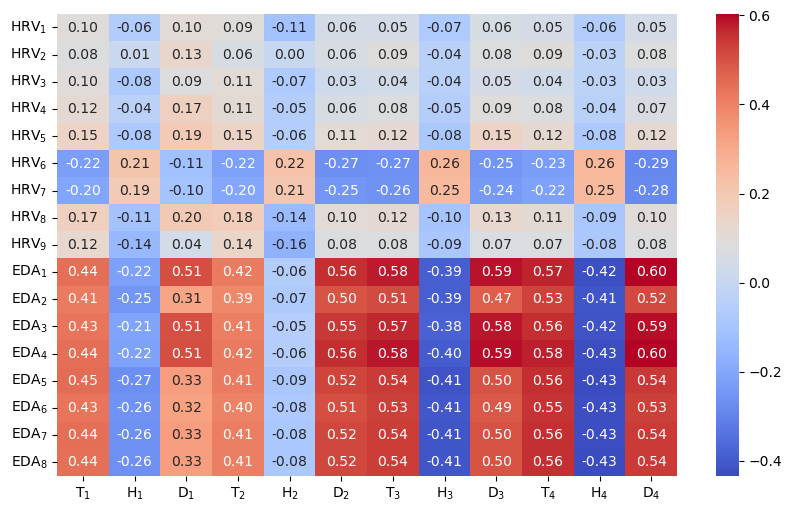

In [14]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S07')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/viz/'
plt.savefig(outpath+'S07_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S07_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


### Comfort function Implementation

In [15]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = S07_df[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: S07_df[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: S07_df[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [S07_df['Temp(C)_N1'].quantile(0.30), S07_df['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [S07_df['RH(%)_N1'].quantile(0.30), S07_df['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return 0.5  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
S07_df['lambda'] = S07_df.apply(comfort_label, axis=1)
label_counts = S07_df['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)

print("saving data files as pkl")
savepath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/final_data/data_S07.pkl'
S07_df.to_pickle(savepath)

Variables considered for the comfort function:
HRV Variable: hrv_mean_nni
EDA Variable: eda_phasic_mean
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
0.0    60.888996
0.5    33.540407
1.0     5.570597
Name: proportion, dtype: float64
saving data files as pkl


C:\Users\Tomar\AppData\Local\Temp\ipykernel_32040\2012081680.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S07_df['lambda'] = S07_df.apply(comfort_label, axis=1)


In [16]:
# Group by unique instances
instance_groups = S07_df.groupby('ID_instance')

# Calculate the level of comfort for each instance
comfort_levels = instance_groups['lambda'].mean()  # You can also use .median() or .mode() depending on your preference

# Print the comfort levels
print(comfort_levels)


ID_instance
S07_1     0.000000
S07_10    0.000000
S07_11    0.000000
S07_12    0.416907
S07_13    0.000000
S07_14    0.500000
S07_15    0.500000
S07_16    0.127373
S07_17    0.000000
S07_18    0.000000
S07_19    0.000000
S07_2     0.000000
S07_20    0.000000
S07_21    0.000000
S07_22    0.079670
S07_23    0.127295
S07_24    0.524229
S07_25    0.445130
S07_26    0.500000
S07_27    0.000000
S07_28    0.000000
S07_29    0.308782
S07_3     0.000000
S07_30    0.000000
S07_31    0.420485
S07_32    0.496361
S07_33    0.500000
S07_34    0.000000
S07_35    0.000000
S07_36    0.061801
S07_37    0.500866
S07_38    0.681976
S07_4     0.000000
S07_5     0.000000
S07_6     0.016511
S07_7     0.000000
S07_8     0.025544
S07_9     0.000000
Name: lambda, dtype: float64


### Weather Station Data (During Commuting):

In [19]:
import pandas as pd

# Load the weather data from the uploaded Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
weather_data = pd.read_excel(file_path)

# Display the first few rows of the weather data to understand its structure
weather_data.head()


,Data,Relative Humidity Min (%),Relative Humidity Ave (%),Relative Humidity Max (%),Relative Humidity StDev (%),Air Temperature Min ('C),Air Temperature Ave ('C),Air Temperature Max ('C),Air Temperature StDev ('C),Solar Radiation Min (W/m2),...,Wind direction PrevDir (>),Wind direction RisDir (>),Wind direction RisVel (m/s),Wind direction StdDevDir (>),Wind direction CalmPerc (%),Wind speed Min (m/s),Wind speed Ave (m/s),Wind speed Max (m/s),Wind speed StDev (m/s),Rainfall Tot (mm)
0,2023-07-01 00:00:00,99.40,99.41,99.42,0.0,15.50,15.60,15.69,0.0,0.0,...,298,290,1.0,53,6,0.0,1.3,3.0,0.6,0.0
1,2023-07-01 00:10:00,99.40,99.41,99.41,0.0,15.55,15.65,15.74,0.0,0.0,...,165,155,0.5,69,25,0.0,0.8,1.9,0.5,0.2
2,2023-07-01 00:20:00,99.40,99.41,99.42,0.0,15.60,15.67,15.74,0.0,0.0,...,296,296,0.8,29,29,0.0,0.7,1.5,0.5,0.0
3,2023-07-01 00:30:00,99.40,99.41,99.42,0.0,15.55,15.64,15.75,0.0,0.0,...,333,336,0.6,69,17,0.0,0.8,2.6,0.6,0.0
4,2023-07-01 00:40:00,99.39,99.40,99.40,0.0,15.46,15.51,15.58,0.0,0.0,...,327,324,1.6,20,3,0.0,1.6,2.6,0.6,0.0


In [20]:
# Define the commuting instance data
commuting_data = [
    {"ID_instance": "S02_1",  "Start Time" : "2023-07-18 14:52:46", "End Time" : "2023-07-18 15:24:35"},
    {"ID_instance": "S02_2",  "Start Time" : "2023-07-18 19:50:53", "End Time" : "2023-07-18 19:59:40"},
    {"ID_instance": "S02_3",  "Start Time" : "2023-07-19 12:28:27", "End Time" : "2023-07-19 12:34:18"},
    {"ID_instance": "S02_4",  "Start Time" : "2023-07-19 18:07:11", "End Time" : "2023-07-19 18:21:09"},
    {"ID_instance": "S02_5",  "Start Time" : "2023-07-20 07:01:38", "End Time" : "2023-07-20 07:28:26"},
    {"ID_instance": "S02_6",  "Start Time" : "2023-07-20 12:28:53", "End Time" : "2023-07-20 12:59:09"},
    {"ID_instance": "S02_7",  "Start Time" : "2023-07-20 13:59:20", "End Time" : "2023-07-20 14:11:11"},
    {"ID_instance": "S02_8",  "Start Time" : "2023-07-21 06:58:59", "End Time" : "2023-07-21 07:16:35"},
    {"ID_instance": "S02_9",  "Start Time" : "2023-07-22 13:53:54", "End Time" : "2023-07-22 14:00:47"},
    {"ID_instance": "S02_10", "Start Time" : "2023-07-22 14:12:12", "End Time" : "2023-07-22 14:19:21"},
    {"ID_instance": "S02_11", "Start Time" : "2023-07-22 17:23:20", "End Time" : "2023-07-22 17:49:40"},
    {"ID_instance": "S02_12", "Start Time" : "2023-07-22 20:38:21", "End Time" : "2023-07-22 21:18:45"},
    {"ID_instance": "S02_13", "Start Time" : "2023-07-23 09:23:04", "End Time" : "2023-07-23 10:40:02"},
    {"ID_instance": "S02_14", "Start Time" : "2023-07-23 17:47:06", "End Time" : "2023-07-23 17:55:58"},
    {"ID_instance": "S02_15", "Start Time" : "2023-07-23 18:31:16", "End Time" : "2023-07-23 19:06:11"},
    {"ID_instance": "S02_16", "Start Time" : "2023-07-23 20:38:07", "End Time" : "2023-07-23 21:28:09"},
    {"ID_instance": "S02_17", "Start Time" : "2023-07-23 21:30:40", "End Time" : "2023-07-23 21:44:29"},
    {"ID_instance": "S02_18", "Start Time" : "2023-07-24 06:59:16", "End Time" : "2023-07-24 07:10:45"},
    {"ID_instance": "S02_19", "Start Time" : "2023-07-24 08:26:12", "End Time" : "2023-07-24 08:39:07"},
    {"ID_instance": "S02_20", "Start Time" : "2023-07-24 15:08:25", "End Time" : "2023-07-24 15:14:32"},
    {"ID_instance": "S02_21", "Start Time" : "2023-07-24 16:03:08", "End Time" : "2023-07-24 16:08:00"},
    {"ID_instance": "S02_22", "Start Time" : "2023-07-25 07:05:08", "End Time" : "2023-07-25 07:17:15"},
    {"ID_instance": "S02_23", "Start Time" : "2023-07-25 15:37:19", "End Time" : "2023-07-25 15:50:55"},
    {"ID_instance": "S02_24", "Start Time" : "2023-07-25 22:17:40", "End Time" : "2023-07-25 22:32:47"},
    {"ID_instance": "S02_25", "Start Time" : "2023-07-26 06:50:55", "End Time" : "2023-07-26 07:15:12"},
    {"ID_instance": "S02_26", "Start Time" : "2023-07-26 12:39:26", "End Time" : "2023-07-26 13:17:23"},
    {"ID_instance": "S02_27", "Start Time" : "2023-07-26 14:31:15", "End Time" : "2023-07-26 14:35:17"},
    {"ID_instance": "S02_28", "Start Time" : "2023-07-26 14:40:09", "End Time" : "2023-07-26 14:50:25"},
    {"ID_instance": "S02_29", "Start Time" : "2023-07-26 15:18:35", "End Time" : "2023-07-26 15:24:27"},
    {"ID_instance": "S02_30", "Start Time" : "2023-07-26 16:19:26", "End Time" : "2023-07-26 16:34:33"},
    {"ID_instance": "S02_31", "Start Time" : "2023-07-27 03:47:46", "End Time" : "2023-07-27 03:53:56"},
    {"ID_instance": "S02_32", "Start Time" : "2023-07-28 07:10:46", "End Time" : "2023-07-28 07:22:12"},
    {"ID_instance": "S02_33", "Start Time" : "2023-07-28 12:47:06", "End Time" : "2023-07-28 13:02:05"},
    {"ID_instance": "S02_34", "Start Time" : "2023-07-28 13:46:47", "End Time" : "2023-07-28 13:54:30"},
    {"ID_instance": "S02_35", "Start Time" : "2023-07-28 16:27:21", "End Time" : "2023-07-28 18:02:32"},
    {"ID_instance": "S02_36", "Start Time" : "2023-07-28 21:33:38", "End Time" : "2023-07-28 22:06:23"},
    {"ID_instance": "S02_37", "Start Time" : "2023-07-30 18:46:16", "End Time" : "2023-07-30 19:05:30"},
    {"ID_instance": "S02_38", "Start Time" : "2023-07-30 19:45:17", "End Time" : "2023-07-30 21:49:55"},
]

# Convert the commuting instance data to a DataFrame
commuting_df = pd.DataFrame(commuting_data)

# Convert the Start Time and End Time columns to datetime
commuting_df['Start Time'] = pd.to_datetime(commuting_df['Start Time'])
commuting_df['End Time'] = pd.to_datetime(commuting_df['End Time'])

# Display the commuting instance DataFrame
commuting_df.head()


,ID_instance,Start Time,End Time
0,S02_1,2023-07-18 14:52:46,2023-07-18 15:24:35
1,S02_2,2023-07-18 19:50:53,2023-07-18 19:59:40
2,S02_3,2023-07-19 12:28:27,2023-07-19 12:34:18
3,S02_4,2023-07-19 18:07:11,2023-07-19 18:21:09
4,S02_5,2023-07-20 07:01:38,2023-07-20 07:28:26


In [21]:
# Convert the Data column in weather data to datetime
weather_data['Data'] = pd.to_datetime(weather_data['Data'])

# Initialize an empty list to store the results
results = []

# Iterate over each commuting instance
for _, row in commuting_df.iterrows():
    # Filter the weather data within the date-time range of the commuting instance
    mask = (weather_data['Data'] >= row['Start Time']) & (weather_data['Data'] <= row['End Time'])
    filtered_data = weather_data[mask]
    
    # Calculate the average, min, and max for Air Temperature and Relative Humidity 
    min_temp = filtered_data['Air Temperature Min (\'C)'].min()
    max_temp = filtered_data['Air Temperature Max (\'C)'].max()
    avg_temp = filtered_data['Air Temperature Ave (\'C)'].mean()

    min_rh = filtered_data['Relative Humidity Min (%)'].min()
    max_rh = filtered_data['Relative Humidity Max (%)'].max()
    avg_rh = filtered_data['Relative Humidity Ave (%)'].mean()
    
    # min_sr = filtered_data['Solar Radiation Ave (W/m2)'].min()
    # max_sr = filtered_data['Solar Radiation Ave (W/m2)'].max()
    avg_sr = filtered_data['Solar Radiation Ave (W/m2)'].mean()

    # Append the results
    results.append({
        'ID_instance': row['ID_instance'],
        'Min_Air_Temperature': min_temp,
        'Max_Air_Temperature': max_temp,
        'Avg_Air_Temperature': avg_temp,
        'Min_Relative_Humidity': min_rh,
        'Max_Relative_Humidity': max_rh,
        'Avg_Relative_Humidity': avg_rh,
        'Avg_Solar_Radiation': avg_sr
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,ID_instance,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,S02_1,35.39,36.99,36.070000,27.08,30.16,28.646667,939.446667
1,S02_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S02_3,32.84,33.47,33.200000,25.90,31.90,29.340000,1047.550000
3,S02_4,35.43,36.12,35.650000,28.96,32.09,30.390000,311.010000
4,S02_5,23.25,24.72,24.110000,82.83,93.64,88.025000,127.850000
5,S02_6,31.77,33.24,32.420000,38.39,41.63,40.126667,990.973333
6,S02_7,32.89,34.83,33.525000,35.61,40.42,38.720000,1039.820000
7,S02_8,23.80,24.47,24.110000,74.74,78.18,76.805000,97.745000
8,S02_9,32.66,33.20,32.920000,28.65,30.12,29.510000,1067.400000
9,S02_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Weather Station Data (Day of Commuting from 8am to 6pm):

In [22]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Data' column to datetime format
data['Data'] = pd.to_datetime(data['Data'])

# Define the date ranges as given in the task
date_ranges = [
    ("2023-07-18 08:00:00", "2023-07-18 18:00:00"),
    ("2023-07-19 08:00:00", "2023-07-19 18:00:00"),
    ("2023-07-20 08:00:00", "2023-07-20 18:00:00"),
    ("2023-07-21 08:00:00", "2023-07-21 18:00:00"),
    ("2023-07-22 08:00:00", "2023-07-22 18:00:00"),
    ("2023-07-23 08:00:00", "2023-07-23 18:00:00"),
    ("2023-07-24 08:00:00", "2023-07-24 18:00:00"),
    ("2023-07-25 08:00:00", "2023-07-25 18:00:00"),
    ("2023-07-26 08:00:00", "2023-07-26 18:00:00"),
    ("2023-07-27 08:00:00", "2023-07-27 18:00:00"),
    ("2023-07-28 08:00:00", "2023-07-28 18:00:00"),
    ("2023-07-30 08:00:00", "2023-08-30 18:00:00")
    
]

# Initialize a list to store statistics for each day
daily_statistics = []

# Calculate statistics for each date range
for start, end in date_ranges:
    day_data = data[(data['Data'] >= start) & (data['Data'] <= end)]
    
    stats = {
        'Date Range': f'{start} to {end}',
        'Min_Air_Temperature': day_data["Air Temperature Min ('C)"].min(),
        'Max_Air_Temperature': day_data["Air Temperature Max ('C)"].max(),
        'Avg_Air_Temperature': day_data["Air Temperature Ave ('C)"].mean(),
        'Min_Relative_Humidity': day_data['Relative Humidity Min (%)'].min(),
        'Max_Relative_Humidity': day_data['Relative Humidity Max (%)'].max(),
        'Avg_Relative_Humidity': day_data['Relative Humidity Ave (%)'].mean(),
        'Avg_Solar_Radiation': day_data['Solar Radiation Ave (W/m2)'].mean()
    }
    
    daily_statistics.append(stats)

# Convert the results to a DataFrame for better readability
daily_statistics_df = pd.DataFrame(daily_statistics)
daily_statistics_df


,Date Range,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,2023-07-18 08:00:00 to 2023-07-18 18:00:00,26.27,37.02,33.207377,23.80,60.80,34.469016,770.390000
1,2023-07-19 08:00:00 to 2023-07-19 18:00:00,24.24,37.61,32.632787,21.18,58.22,35.113279,763.216721
2,2023-07-20 08:00:00 to 2023-07-20 18:00:00,25.04,35.66,31.593934,29.60,80.87,43.907705,773.849836
3,2023-07-21 08:00:00 to 2023-07-21 18:00:00,24.76,33.65,29.944098,33.10,77.72,50.506066,655.114918
4,2023-07-22 08:00:00 to 2023-07-22 18:00:00,24.64,34.78,31.060164,24.22,93.24,42.282623,731.931311
5,2023-07-23 08:00:00 to 2023-07-23 18:00:00,23.83,34.30,30.147049,24.41,77.88,47.096721,730.849016
6,2023-07-24 08:00:00 to 2023-07-24 18:00:00,25.08,36.17,32.127541,24.29,73.00,40.581148,652.817213
7,2023-07-25 08:00:00 to 2023-07-25 18:00:00,21.71,32.59,28.498197,28.91,85.72,52.332131,486.820656
8,2023-07-26 08:00:00 to 2023-07-26 18:00:00,19.55,28.26,24.287049,31.59,59.77,44.858197,594.116885
9,2023-07-27 08:00:00 to 2023-07-27 18:00:00,19.91,31.00,26.883115,15.84,58.87,32.551148,800.511803


### Living Lab (Day of Commuting from 8am to 6pm):

In [23]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_d.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day 8AM to 6PM
time_intervals = [
    ("2023-07-18 08:00:00", "2023-07-18 18:00:00"),
    ("2023-07-19 08:00:00", "2023-07-19 18:00:00"),
    ("2023-07-20 08:00:00", "2023-07-20 18:00:00"),
    ("2023-07-21 08:00:00", "2023-07-21 18:00:00"),
    ("2023-07-22 08:00:00", "2023-07-22 18:00:00"),
    ("2023-07-23 08:00:00", "2023-07-23 18:00:00"),
    ("2023-07-24 08:00:00", "2023-07-24 18:00:00"),
    ("2023-07-25 08:00:00", "2023-07-25 18:00:00"),
    ("2023-07-26 08:00:00", "2023-07-26 18:00:00"),
    ("2023-07-27 08:00:00", "2023-07-27 18:00:00"),
    ("2023-07-28 08:00:00", "2023-07-28 18:00:00"),
    ("2023-07-30 08:00:00", "2023-08-30 18:00:00") 
]

# ## Define the Times one hour before entering the LL
# time_intervals = [
#     ("2023-07-18 16:43:11", "2023-07-18 16:48:21"),
#     ("2023-07-22 06:51:50", "2023-07-22 07:22:07"),
#     ("2023-07-24 12:40:35", "2023-07-24 12:51:03"),
#     ("2023-07-26 06:33:50", "2023-07-26 06:45:09"),
#     ("2023-07-31 11:37:32", "2023-07-31 11:49:54")
# ]

# ## Define the Times one hour after entering the LL
# time_intervals = [
#     ("2023-07-18 16:43:11", "2023-07-18 16:48:21"),
#     ("2023-07-22 06:51:50", "2023-07-22 07:22:07"),
#     ("2023-07-24 12:40:35", "2023-07-24 12:51:03"),
#     ("2023-07-26 06:33:50", "2023-07-26 06:45:09"),
#     ("2023-07-31 11:37:32", "2023-07-31 11:49:54")
# ]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Min_Temp_Globe,Max_Temp_Globe,Avg_Temp_Globe,Min_Relative_Humidity,Max_Relative_Humidity,Mean_Relative_Humidity,Illu_min,Illu_max,Illu_avg,Ele1_sum,Ele2_sum,Window_open_%,Door_open_%
0,2023-07-18 08:00:00,2023-07-18 18:00:00,26.272461,32.085205,28.386361,950.003174,950.003174,950.003174,44.190796,55.350704,48.401955,59.294891,355.975708,179.025047,5.484489,35.209287,38.333333,34.166667
1,2023-07-19 08:00:00,2023-07-19 18:00:00,24.809814,31.166504,27.963204,950.003174,950.003174,950.003174,44.352562,56.875591,50.182960,58.379173,376.945129,193.976350,5.405644,51.033042,18.333333,49.166667
2,2023-07-20 08:00:00,2023-07-20 18:00:00,28.109131,32.281494,29.912467,950.003174,950.003174,950.003174,45.857323,59.320850,50.845781,71.112823,775.576782,198.282855,5.664047,43.210499,24.166667,68.333333
3,2023-07-21 08:00:00,2023-07-21 18:00:00,28.778076,36.016602,31.408569,950.003174,950.003174,950.003174,38.143852,59.200153,48.448420,53.610992,779.623779,319.958912,5.435977,54.687340,47.500000,83.333333
4,2023-07-22 08:00:00,2023-07-22 18:00:00,30.177490,33.680664,31.297007,950.003174,950.003174,950.003174,34.944534,58.197021,43.339422,63.085747,398.019775,171.244958,5.242671,5.527219,100.000000,0.000000
5,2023-07-23 08:00:00,2023-07-23 18:00:00,29.906982,34.332520,31.273248,950.003174,950.003174,950.003174,33.665894,52.689075,45.746173,71.760559,379.700470,205.810680,5.273444,5.375275,100.000000,0.000000
6,2023-07-24 08:00:00,2023-07-24 18:00:00,29.268799,35.549561,32.139734,950.003174,950.003174,950.003174,29.153070,53.205643,43.493622,24.024391,687.668030,238.224711,5.395237,42.891855,74.166667,70.000000
7,2023-07-25 08:00:00,2023-07-25 18:00:00,26.354980,32.953857,30.256460,950.003174,950.003174,950.003174,30.918484,59.488659,48.217030,5.372238,702.210815,315.614827,5.680049,43.000694,97.500000,94.166667
8,2023-07-26 08:00:00,2023-07-26 18:00:00,24.286865,26.944092,25.602730,950.003174,950.003174,950.003174,37.453468,48.013878,43.347246,112.606621,660.010742,297.984706,5.776158,34.779252,100.000000,30.000000
9,2023-07-27 08:00:00,2023-07-27 18:00:00,23.018799,28.007813,25.109208,950.003174,950.003174,950.003174,27.588034,50.080833,39.744325,75.900078,714.459412,195.864818,6.375864,24.313074,100.000000,28.333333


# Living Lab (Before arrivel and after arrivel)

In [7]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_d.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times 
time_intervals = [
    ("2023-07-18 14:52:46", "2023-07-18 15:24:35"),
    ("2023-07-18 19:50:53", "2023-07-18 19:59:40"),
    ("2023-07-19 12:28:27", "2023-07-19 12:34:18"),
    ("2023-07-19 18:07:11", "2023-07-19 18:21:09"),
    ("2023-07-20 07:01:38", "2023-07-20 07:28:26"),
    ("2023-07-20 12:28:53", "2023-07-20 12:59:09"),
    ("2023-07-20 13:59:20", "2023-07-20 14:11:11"),
    ("2023-07-21 06:58:59", "2023-07-21 07:16:35"),
    ("2023-07-23 21:30:40", "2023-07-23 21:44:29"),
    ("2023-07-24 06:59:16", "2023-07-24 07:10:45"),
    ("2023-07-24 08:26:12", "2023-07-24 08:39:07"),
    ("2023-07-24 15:08:25", "2023-07-24 15:14:32"),
    ("2023-07-24 16:03:08", "2023-07-24 16:08:00"),
    ("2023-07-25 07:05:08", "2023-07-25 07:17:15"),
    ("2023-07-25 15:37:19", "2023-07-25 15:50:55"),
    ("2023-07-25 22:17:40", "2023-07-25 22:32:47"),
    ("2023-07-26 06:50:55", "2023-07-26 07:15:12"),
    ("2023-07-26 12:39:26", "2023-07-26 13:17:23"),
    ("2023-07-26 14:31:15", "2023-07-26 14:35:17"),
    ("2023-07-26 14:40:09", "2023-07-26 14:50:25"),
    ("2023-07-26 15:18:35", "2023-07-26 15:24:27"),
    ("2023-07-26 16:19:26", "2023-07-26 16:34:33"),
    ("2023-07-27 03:47:46", "2023-07-27 03:53:56"),
    ("2023-07-28 07:10:46", "2023-07-28 07:22:12"),
    ("2023-07-28 12:47:06", "2023-07-28 13:02:05"),
    ("2023-07-28 13:46:47", "2023-07-28 13:54:30"),
    ("2023-07-28 16:27:21", "2023-07-28 18:02:32"),
    ("2023-07-28 21:33:38", "2023-07-28 22:06:23")

    
]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Min_Temp_Globe,Max_Temp_Globe,Avg_Temp_Globe,Min_Relative_Humidity,Max_Relative_Humidity,Mean_Relative_Humidity,Illu_min,Illu_max,Illu_avg,Ele1_sum,Ele2_sum,Window_open_%,Door_open_%
0,2023-07-18 14:52:46,2023-07-18 15:24:35,29.014160,29.386719,29.233085,950.003174,950.003174,950.003174,46.254978,46.866829,46.551607,179.636002,312.572662,278.404752,0.314266,0.616989,0.0,0.000000
1,2023-07-18 19:50:53,2023-07-18 19:59:40,31.099854,31.165039,31.132447,950.003174,950.003174,950.003174,40.347870,40.359669,40.353769,2.842712,3.680229,3.261471,0.088310,0.086963,100.0,0.000000
2,2023-07-19 12:28:27,2023-07-19 12:34:18,26.644287,26.644287,26.644287,950.003174,950.003174,950.003174,51.544781,51.544781,51.544781,105.553246,105.553246,105.553246,0.043797,0.271286,0.0,0.000000
3,2023-07-19 18:07:11,2023-07-19 18:21:09,30.339355,30.390381,30.361735,950.003174,950.003174,950.003174,44.398201,46.051540,44.989541,247.997864,297.496796,274.124532,0.131550,0.660486,0.0,100.000000
4,2023-07-20 07:01:38,2023-07-20 07:28:26,28.176270,28.567139,28.422201,950.003174,950.003174,950.003174,57.302837,59.695377,58.318580,106.248856,116.941261,111.584759,0.279552,3.682749,100.0,100.000000
5,2023-07-20 12:28:53,2023-07-20 12:59:09,29.817871,29.907715,29.858520,950.003174,950.003174,950.003174,50.581608,50.669994,50.615908,90.721130,117.804909,106.388283,0.270117,3.170525,0.0,100.000000
6,2023-07-20 13:59:20,2023-07-20 14:11:11,30.137451,30.145020,30.141236,950.003174,950.003174,950.003174,50.336628,50.342445,50.339536,213.032532,219.191925,216.112229,0.086350,0.120500,0.0,0.000000
7,2023-07-21 06:58:59,2023-07-21 07:16:35,27.755371,28.392822,28.139241,950.003174,950.003174,950.003174,56.784992,57.110119,56.977011,65.790367,82.228470,72.669919,0.135578,0.483826,100.0,100.000000
8,2023-07-23 21:30:40,2023-07-23 21:44:29,31.778564,31.819824,31.792969,950.003174,950.003174,950.003174,43.032463,43.221893,43.146721,1.628876,1.669312,1.654053,0.132224,0.134466,100.0,0.000000
9,2023-07-24 06:59:16,2023-07-24 07:10:45,30.627686,30.644287,30.635987,950.003174,950.003174,950.003174,50.581627,52.508411,51.545019,56.431961,66.597748,61.514854,0.084145,0.088869,0.0,0.000000


In [24]:
import pandas as pd
from datetime import datetime, timedelta

# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_d.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": " S07_1 ", "Start Time": "2023-07-18 14:52:46", "End Time": "2023-07-18 15:24:35"},
    {"ID_instance": " S07_3 ", "Start Time": "2023-07-19 12:28:27", "End Time": "2023-07-19 12:34:18"},
    {"ID_instance": " S07_5 ", "Start Time": "2023-07-20 07:01:38", "End Time": "2023-07-20 07:28:26"},
    {"ID_instance": " S07_6 ", "Start Time": "2023-07-20 12:28:53", "End Time": "2023-07-20 12:59:09"},
    {"ID_instance": " S07_7 ", "Start Time": "2023-07-20 13:59:20", "End Time": "2023-07-20 14:11:11"},
    {"ID_instance": " S07_8 ", "Start Time": "2023-07-21 06:58:59", "End Time": "2023-07-21 07:16:35"},
    {"ID_instance": " S07_18", "Start Time": "2023-07-24 06:59:16", "End Time": "2023-07-24 07:10:45"},
    {"ID_instance": " S07_19", "Start Time": "2023-07-24 08:26:12", "End Time": "2023-07-24 08:39:07"},
    {"ID_instance": " S07_20", "Start Time": "2023-07-24 15:08:25", "End Time": "2023-07-24 15:14:32"},
    {"ID_instance": " S07_22", "Start Time": "2023-07-25 07:05:08", "End Time": "2023-07-25 07:17:15"},
    {"ID_instance": " S07_23", "Start Time": "2023-07-25 15:37:19", "End Time": "2023-07-25 15:50:55"},
    {"ID_instance": " S07_25", "Start Time": "2023-07-26 06:50:55", "End Time": "2023-07-26 07:15:12"},
    {"ID_instance": " S07_26", "Start Time": "2023-07-26 12:39:26", "End Time": "2023-07-26 13:17:23"},
    {"ID_instance": " S07_27", "Start Time": "2023-07-26 14:31:15", "End Time": "2023-07-26 14:35:17"},
    {"ID_instance": " S07_28", "Start Time": "2023-07-26 14:40:09", "End Time": "2023-07-26 14:50:25"},
    {"ID_instance": " S07_29", "Start Time": "2023-07-26 15:18:35", "End Time": "2023-07-26 15:24:27"},
    {"ID_instance": " S07_31", "Start Time": "2023-07-27 03:47:46", "End Time": "2023-07-27 03:53:56"},
    {"ID_instance": " S07_32", "Start Time": "2023-07-28 07:10:46", "End Time": "2023-07-28 07:22:12"},
    {"ID_instance": " S07_33", "Start Time": "2023-07-28 12:47:06", "End Time": "2023-07-28 13:02:05"},
    {"ID_instance": " S07_34", "Start Time": "2023-07-28 13:46:47", "End Time": "2023-07-28 13:54:30"},
   
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Initialize lists to store results
before_results_list = []
after_results_list = []

# Process each commuting instance
for instance in commuting_instances:
    start_time = instance["Start Time"]
    end_time = instance["End Time"]
    one_hour_before = start_time - timedelta(hours=1)
    one_hour_after = end_time + timedelta(hours=1)
    
    # Filter data for one hour before the start time
    before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
    
    # Calculate required metrics for before one hour
    before_result = {
        'ID_instance': instance["ID_instance"],
        'Interval': 'Before',
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the before results list
    before_results_list.append(before_result)
    
    # Filter data for one hour after the end time
    after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]
    
    # Calculate required metrics for after one hour
    after_result = {
        'ID_instance': instance["ID_instance"],
        'Interval': 'After',
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_%': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_%': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the after results list
    after_results_list.append(after_result)

# Create DataFrames from the results lists
before_results_df = pd.DataFrame(before_results_list)
after_results_df = pd.DataFrame(after_results_list)


before_results_df, after_results_df


(   ID_instance Interval          Start_Time            End_Time  Min_Temp_Air  \
 0       S07_1    Before 2023-07-28 21:33:38 2023-07-28 22:06:23     24.595703   
 1       S07_3    Before 2023-07-28 21:33:38 2023-07-28 22:06:23     24.595703   
 2       S07_5    Before 2023-07-28 21:33:38 2023-07-28 22:06:23     24.595703   
 3       S07_6    Before 2023-07-28 21:33:38 2023-07-28 22:06:23     24.595703   
 4       S07_7    Before 2023-07-28 21:33:38 2023-07-28 22:06:23     24.595703   
 5       S07_8    Before 2023-07-28 21:33:38 2023-07-28 22:06:23     24.595703   
 6       S07_18   Before 2023-07-28 21:33:38 2023-07-28 22:06:23     24.595703   
 7       S07_19   Before 2023-07-28 21:33:38 2023-07-28 22:06:23     24.595703   
 8       S07_20   Before 2023-07-28 21:33:38 2023-07-28 22:06:23     24.595703   
 9       S07_22   Before 2023-07-28 21:33:38 2023-07-28 22:06:23     24.595703   
 10      S07_23   Before 2023-07-28 21:33:38 2023-07-28 22:06:23     24.595703   
 11      S07_25 

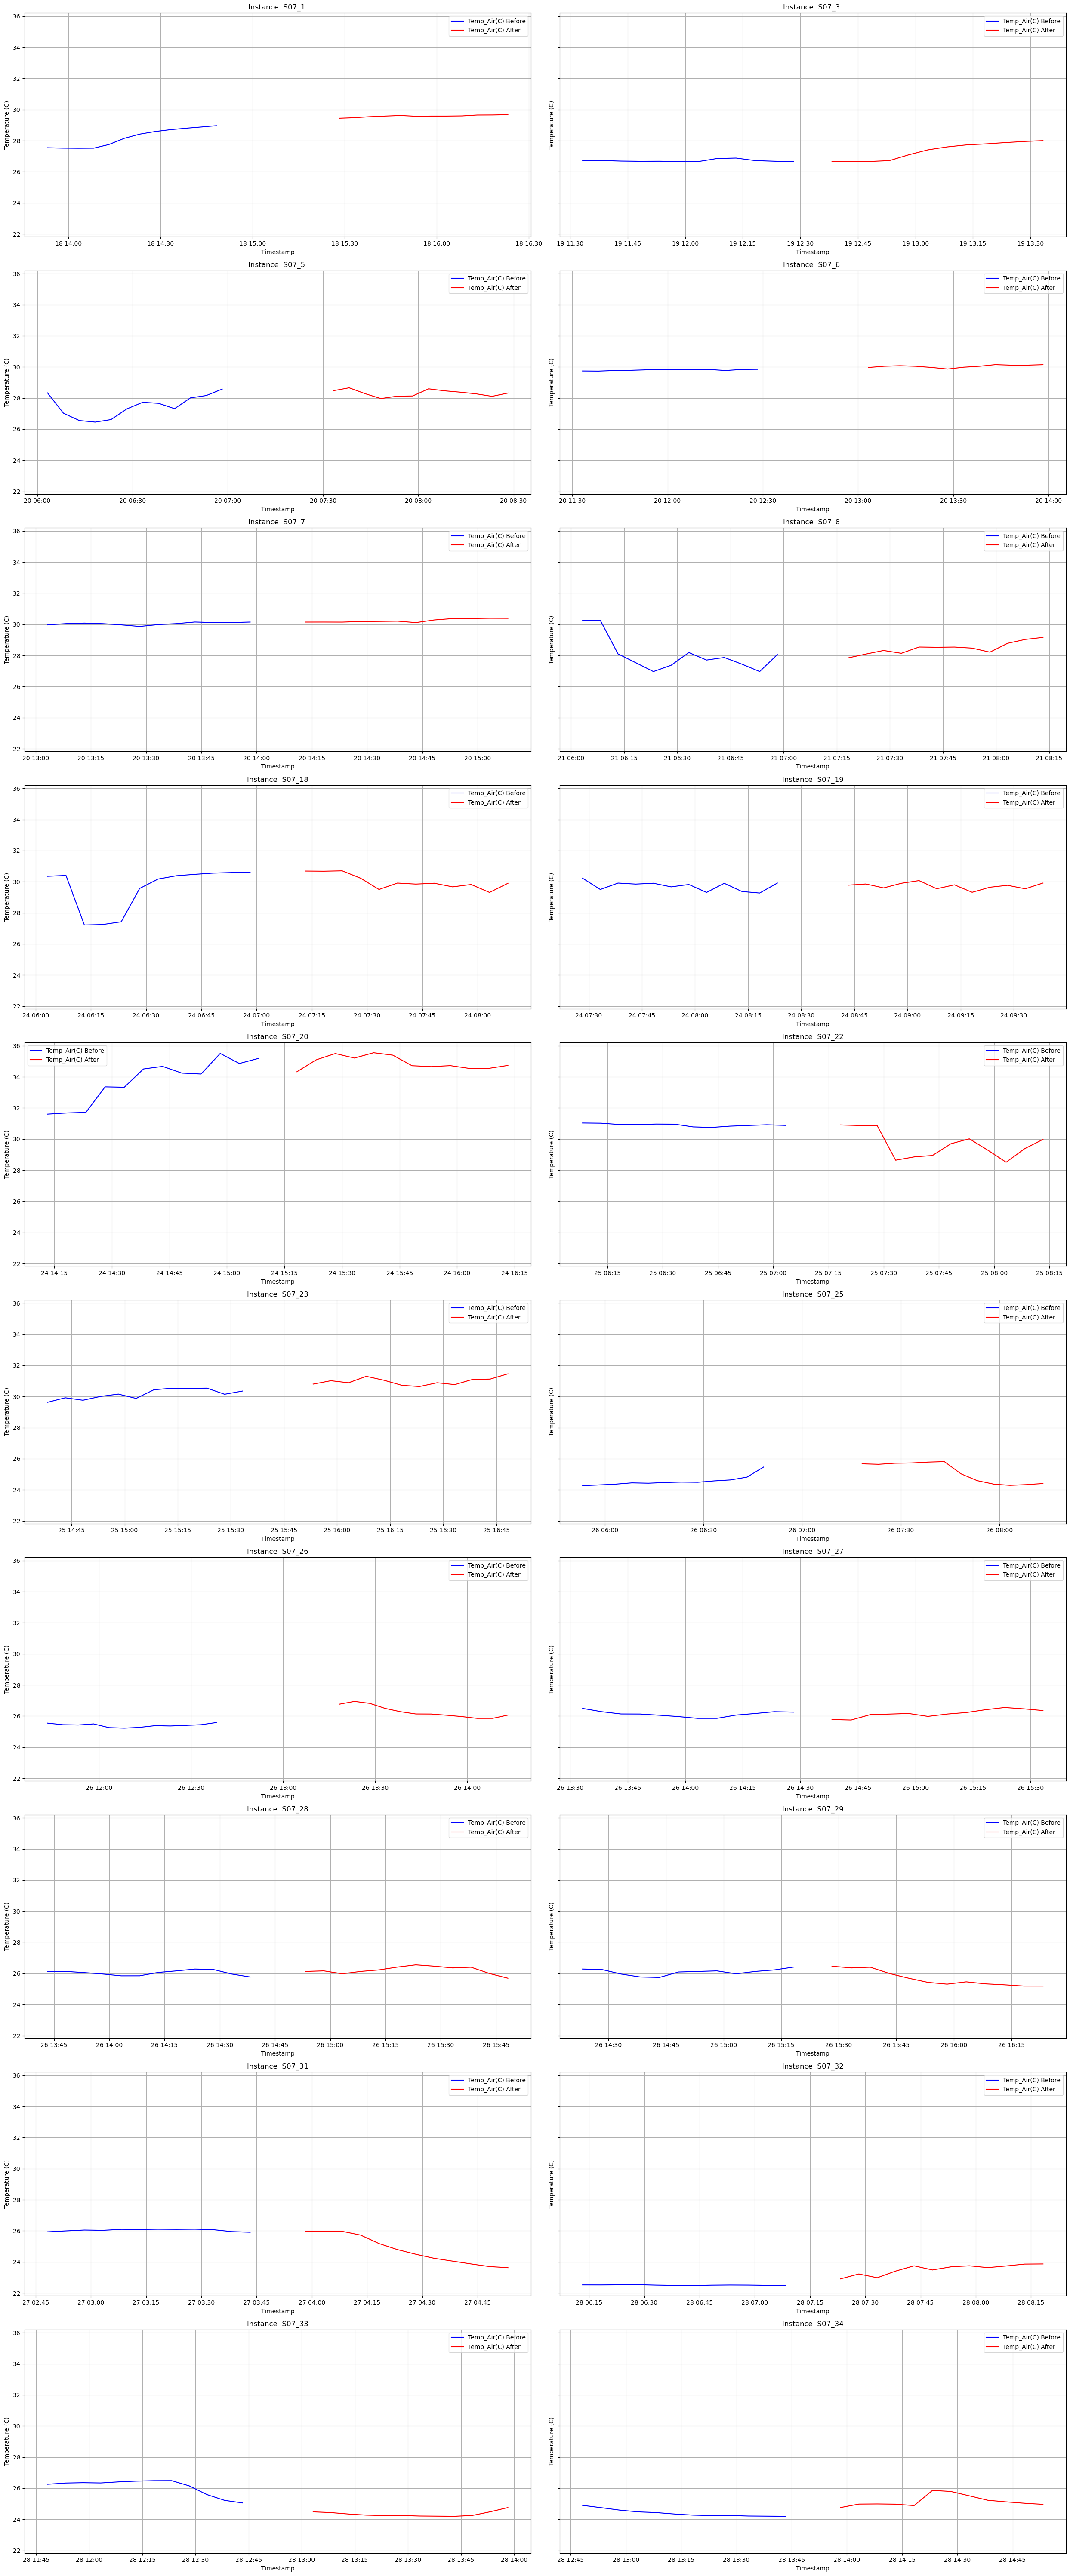

In [15]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_d.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
     {"ID_instance": " S07_1 ", "Start Time": "2023-07-18 14:52:46", "End Time": "2023-07-18 15:24:35"},
    {"ID_instance": " S07_3 ", "Start Time": "2023-07-19 12:28:27", "End Time": "2023-07-19 12:34:18"},
    {"ID_instance": " S07_5 ", "Start Time": "2023-07-20 07:01:38", "End Time": "2023-07-20 07:28:26"},
    {"ID_instance": " S07_6 ", "Start Time": "2023-07-20 12:28:53", "End Time": "2023-07-20 12:59:09"},
    {"ID_instance": " S07_7 ", "Start Time": "2023-07-20 13:59:20", "End Time": "2023-07-20 14:11:11"},
    {"ID_instance": " S07_8 ", "Start Time": "2023-07-21 06:58:59", "End Time": "2023-07-21 07:16:35"},
    {"ID_instance": " S07_18", "Start Time": "2023-07-24 06:59:16", "End Time": "2023-07-24 07:10:45"},
    {"ID_instance": " S07_19", "Start Time": "2023-07-24 08:26:12", "End Time": "2023-07-24 08:39:07"},
    {"ID_instance": " S07_20", "Start Time": "2023-07-24 15:08:25", "End Time": "2023-07-24 15:14:32"},
    {"ID_instance": " S07_22", "Start Time": "2023-07-25 07:05:08", "End Time": "2023-07-25 07:17:15"},
    {"ID_instance": " S07_23", "Start Time": "2023-07-25 15:37:19", "End Time": "2023-07-25 15:50:55"},
    {"ID_instance": " S07_25", "Start Time": "2023-07-26 06:50:55", "End Time": "2023-07-26 07:15:12"},
    {"ID_instance": " S07_26", "Start Time": "2023-07-26 12:39:26", "End Time": "2023-07-26 13:17:23"},
    {"ID_instance": " S07_27", "Start Time": "2023-07-26 14:31:15", "End Time": "2023-07-26 14:35:17"},
    {"ID_instance": " S07_28", "Start Time": "2023-07-26 14:40:09", "End Time": "2023-07-26 14:50:25"},
    {"ID_instance": " S07_29", "Start Time": "2023-07-26 15:18:35", "End Time": "2023-07-26 15:24:27"},
    {"ID_instance": " S07_31", "Start Time": "2023-07-27 03:47:46", "End Time": "2023-07-27 03:53:56"},
    {"ID_instance": " S07_32", "Start Time": "2023-07-28 07:10:46", "End Time": "2023-07-28 07:22:12"},
    {"ID_instance": " S07_33", "Start Time": "2023-07-28 12:47:06", "End Time": "2023-07-28 13:02:05"},
    {"ID_instance": " S07_34", "Start Time": "2023-07-28 13:46:47", "End Time": "2023-07-28 13:54:30"},
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before and after for each instance, creating a subplot matrix
def plot_temperatures_before_after(commuting_instances, data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data['Timestamp'], before_data['Temp_Air(C)_x'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data['Timestamp'], after_data['Temp_Air(C)_x'], label='Temp_Air(C) After', color='red')
        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance
plot_temperatures_before_after(commuting_instances, data)


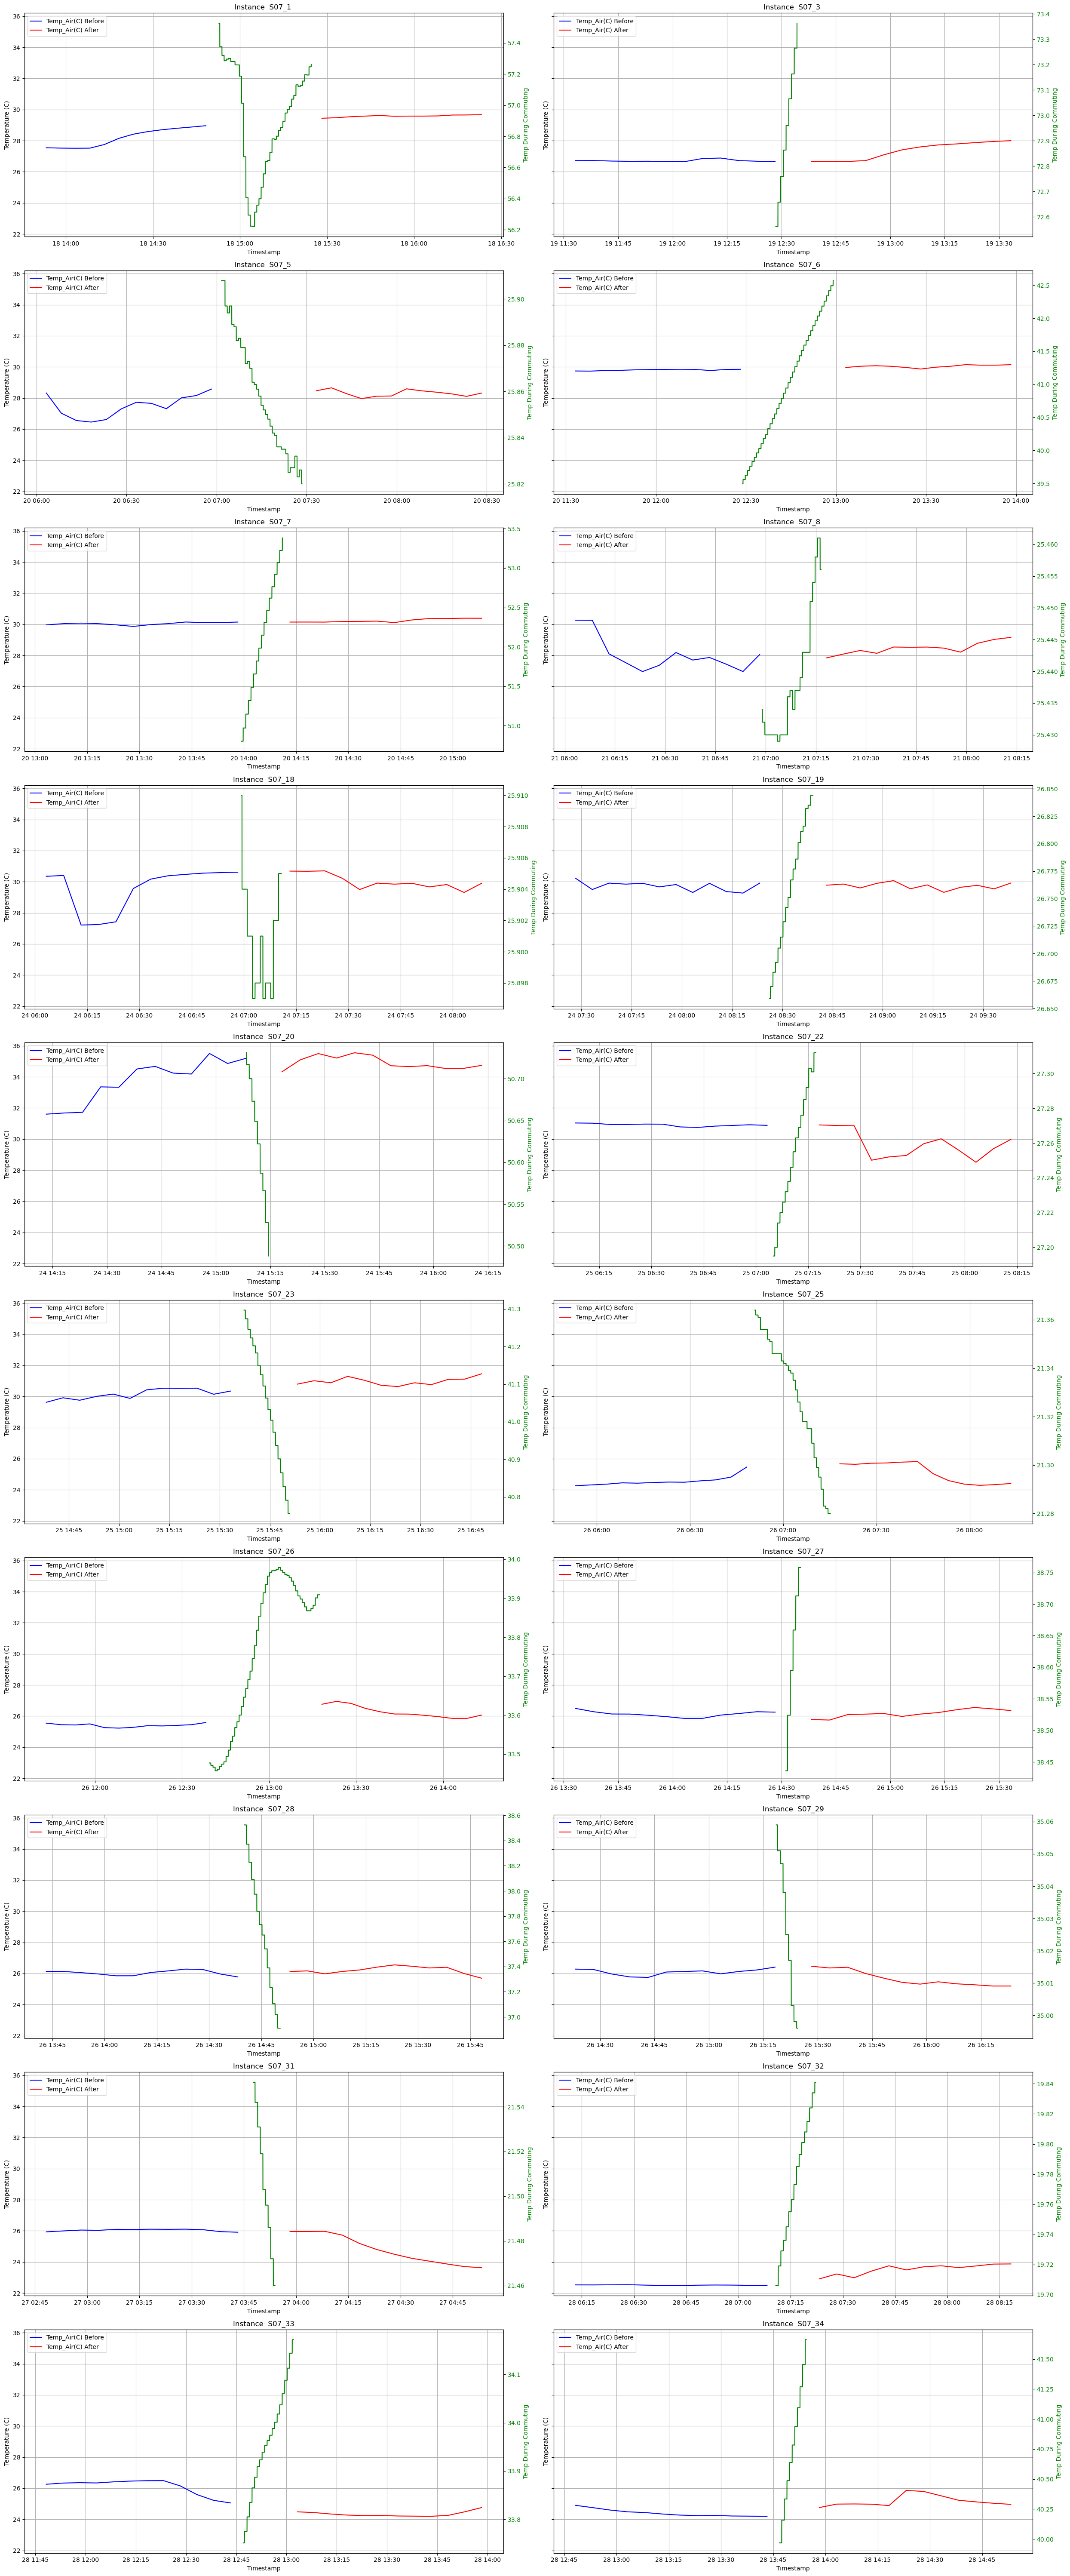

In [25]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_d.csv'

data = pd.read_csv(data_file_path)
commuting_data = S07_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
     {"ID_instance": " S07_1 ", "Start Time": "2023-07-18 14:52:46", "End Time": "2023-07-18 15:24:35"},
    {"ID_instance": " S07_3 ", "Start Time": "2023-07-19 12:28:27", "End Time": "2023-07-19 12:34:18"},
    {"ID_instance": " S07_5 ", "Start Time": "2023-07-20 07:01:38", "End Time": "2023-07-20 07:28:26"},
    {"ID_instance": " S07_6 ", "Start Time": "2023-07-20 12:28:53", "End Time": "2023-07-20 12:59:09"},
    {"ID_instance": " S07_7 ", "Start Time": "2023-07-20 13:59:20", "End Time": "2023-07-20 14:11:11"},
    {"ID_instance": " S07_8 ", "Start Time": "2023-07-21 06:58:59", "End Time": "2023-07-21 07:16:35"},
    {"ID_instance": " S07_18", "Start Time": "2023-07-24 06:59:16", "End Time": "2023-07-24 07:10:45"},
    {"ID_instance": " S07_19", "Start Time": "2023-07-24 08:26:12", "End Time": "2023-07-24 08:39:07"},
    {"ID_instance": " S07_20", "Start Time": "2023-07-24 15:08:25", "End Time": "2023-07-24 15:14:32"},
    {"ID_instance": " S07_22", "Start Time": "2023-07-25 07:05:08", "End Time": "2023-07-25 07:17:15"},
    {"ID_instance": " S07_23", "Start Time": "2023-07-25 15:37:19", "End Time": "2023-07-25 15:50:55"},
    {"ID_instance": " S07_25", "Start Time": "2023-07-26 06:50:55", "End Time": "2023-07-26 07:15:12"},
    {"ID_instance": " S07_26", "Start Time": "2023-07-26 12:39:26", "End Time": "2023-07-26 13:17:23"},
    {"ID_instance": " S07_27", "Start Time": "2023-07-26 14:31:15", "End Time": "2023-07-26 14:35:17"},
    {"ID_instance": " S07_28", "Start Time": "2023-07-26 14:40:09", "End Time": "2023-07-26 14:50:25"},
    {"ID_instance": " S07_29", "Start Time": "2023-07-26 15:18:35", "End Time": "2023-07-26 15:24:27"},
    {"ID_instance": " S07_31", "Start Time": "2023-07-27 03:47:46", "End Time": "2023-07-27 03:53:56"},
    {"ID_instance": " S07_32", "Start Time": "2023-07-28 07:10:46", "End Time": "2023-07-28 07:22:12"},
    {"ID_instance": " S07_33", "Start Time": "2023-07-28 12:47:06", "End Time": "2023-07-28 13:02:05"},
    {"ID_instance": " S07_34", "Start Time": "2023-07-28 13:46:47", "End Time": "2023-07-28 13:54:30"},
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Function to plot temperature data before, during, and after for each instance, creating a subplot matrix
def plot_temperatures_full(commuting_instances, data, commuting_data):
    num_instances = len(commuting_instances)
    nrows = (num_instances + 1) // 2  # Number of rows for the subplot matrix

    fig, axes = plt.subplots(nrows, 2, figsize=(25, nrows * 6), sharex=False, sharey=True)
    axes = axes.flatten()

    for idx, instance in enumerate(commuting_instances):
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Plot the data
        ax = axes[idx]
        ax.plot(before_data['Timestamp'], before_data['Temp_Air(C)_x'], label='Temp_Air(C) Before', color='blue')
        ax.plot(after_data['Timestamp'], after_data['Temp_Air(C)_x'], label='Temp_Air(C) After', color='red')

        # Create another y-axis for during commuting data
        ax2 = ax.twinx()
        ax2.plot(during_data['Timestamp'], during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_ylabel('Temp During Commuting', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        ax.set_title(f'Instance {instance_id}')
        ax.set_xlabel('Timestamp')
        ax.set_ylabel('Temperature (C)')
        ax.legend(loc='upper left')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)


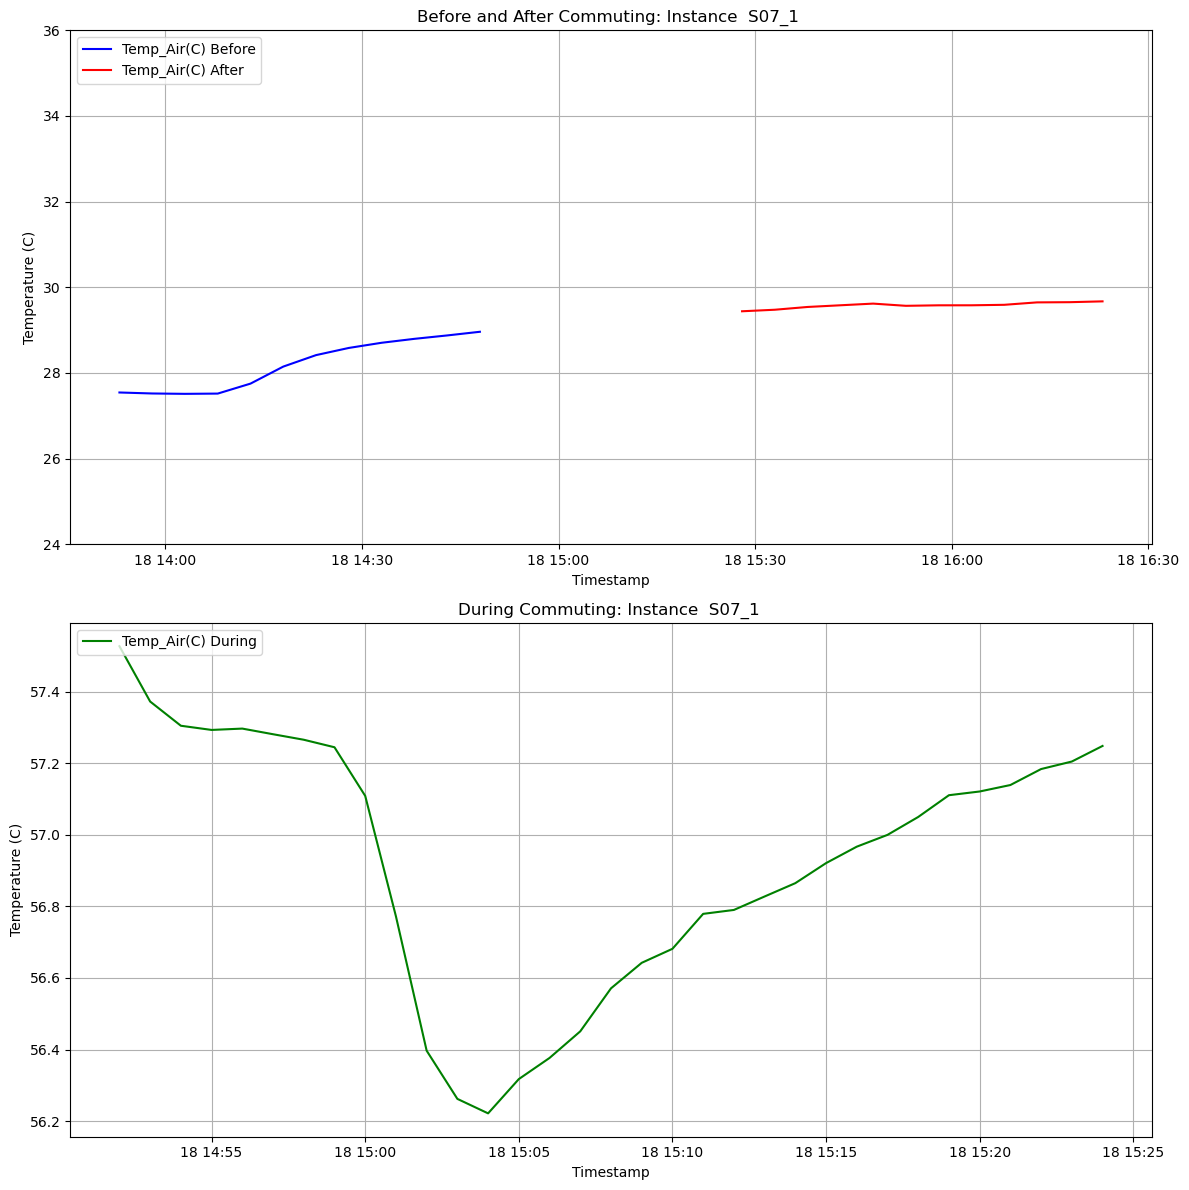

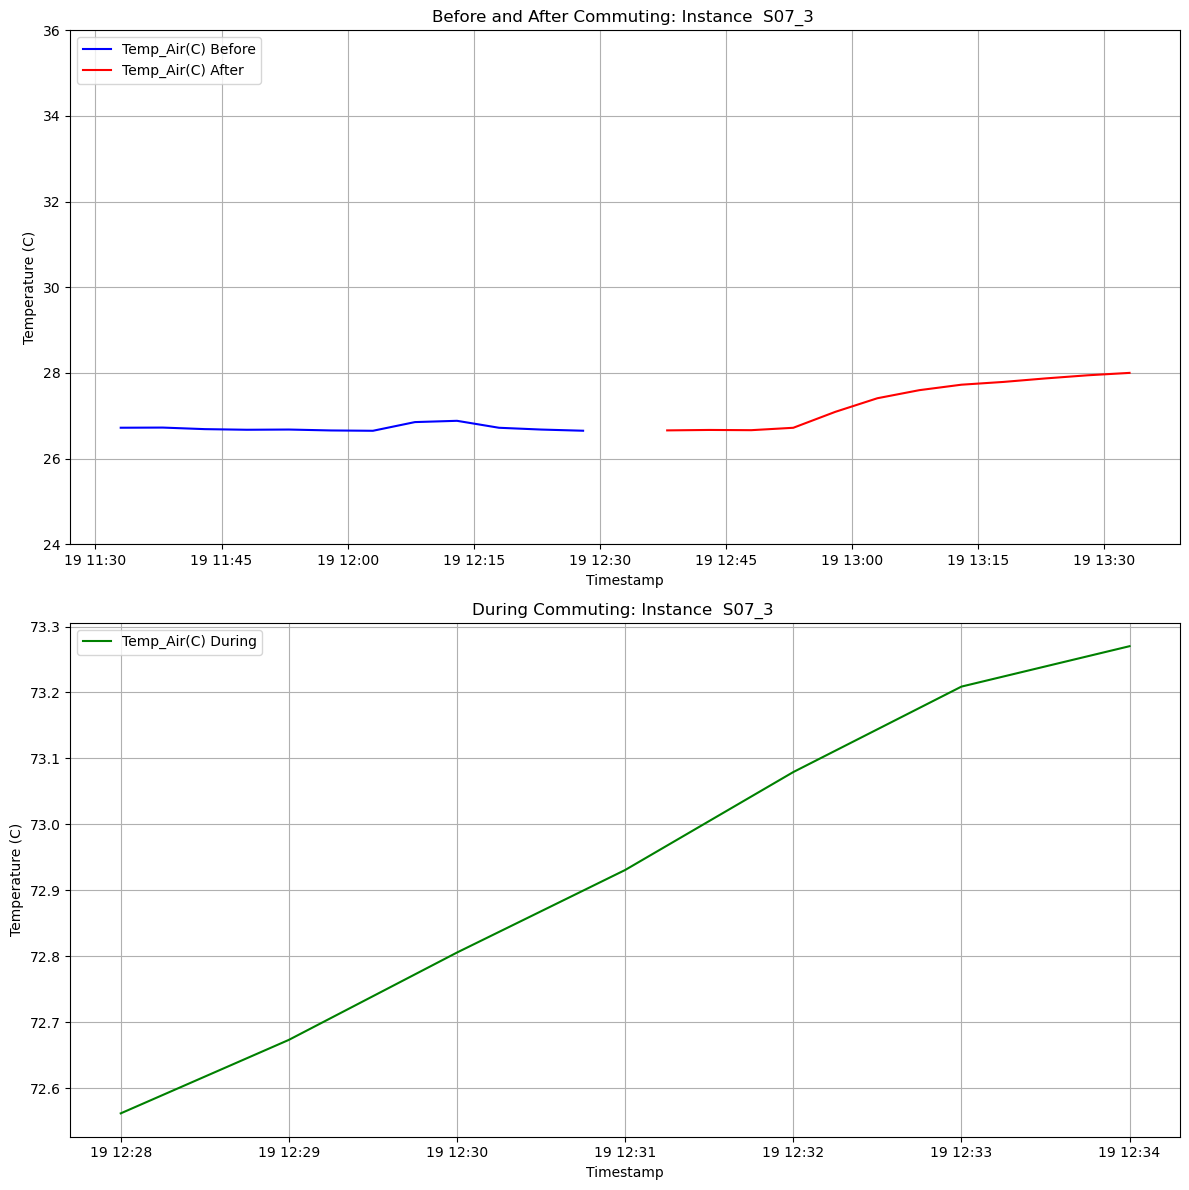

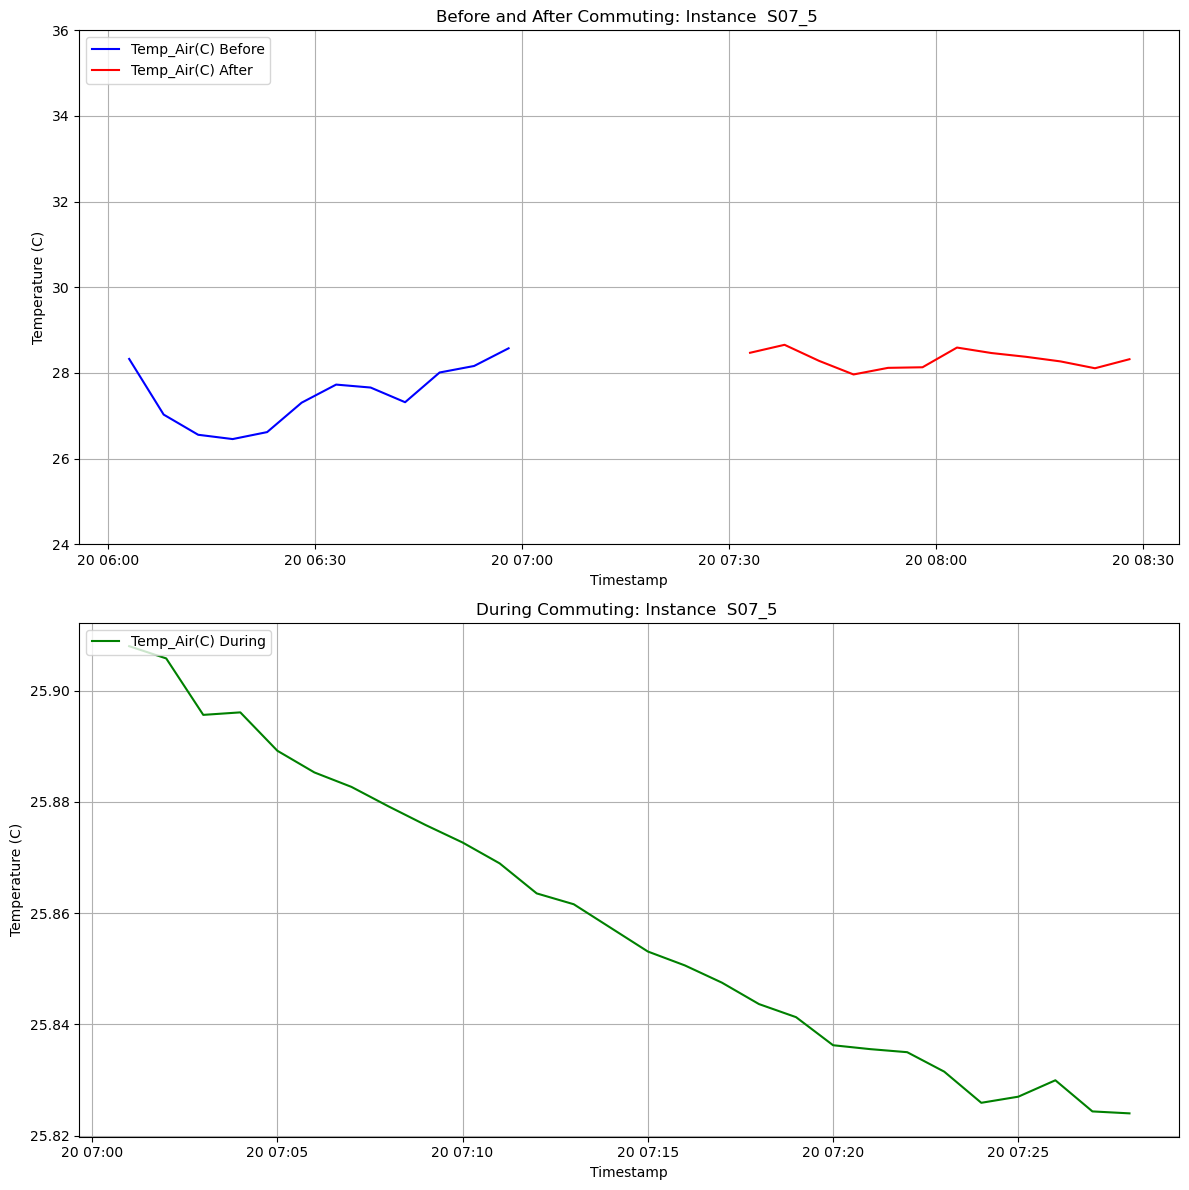

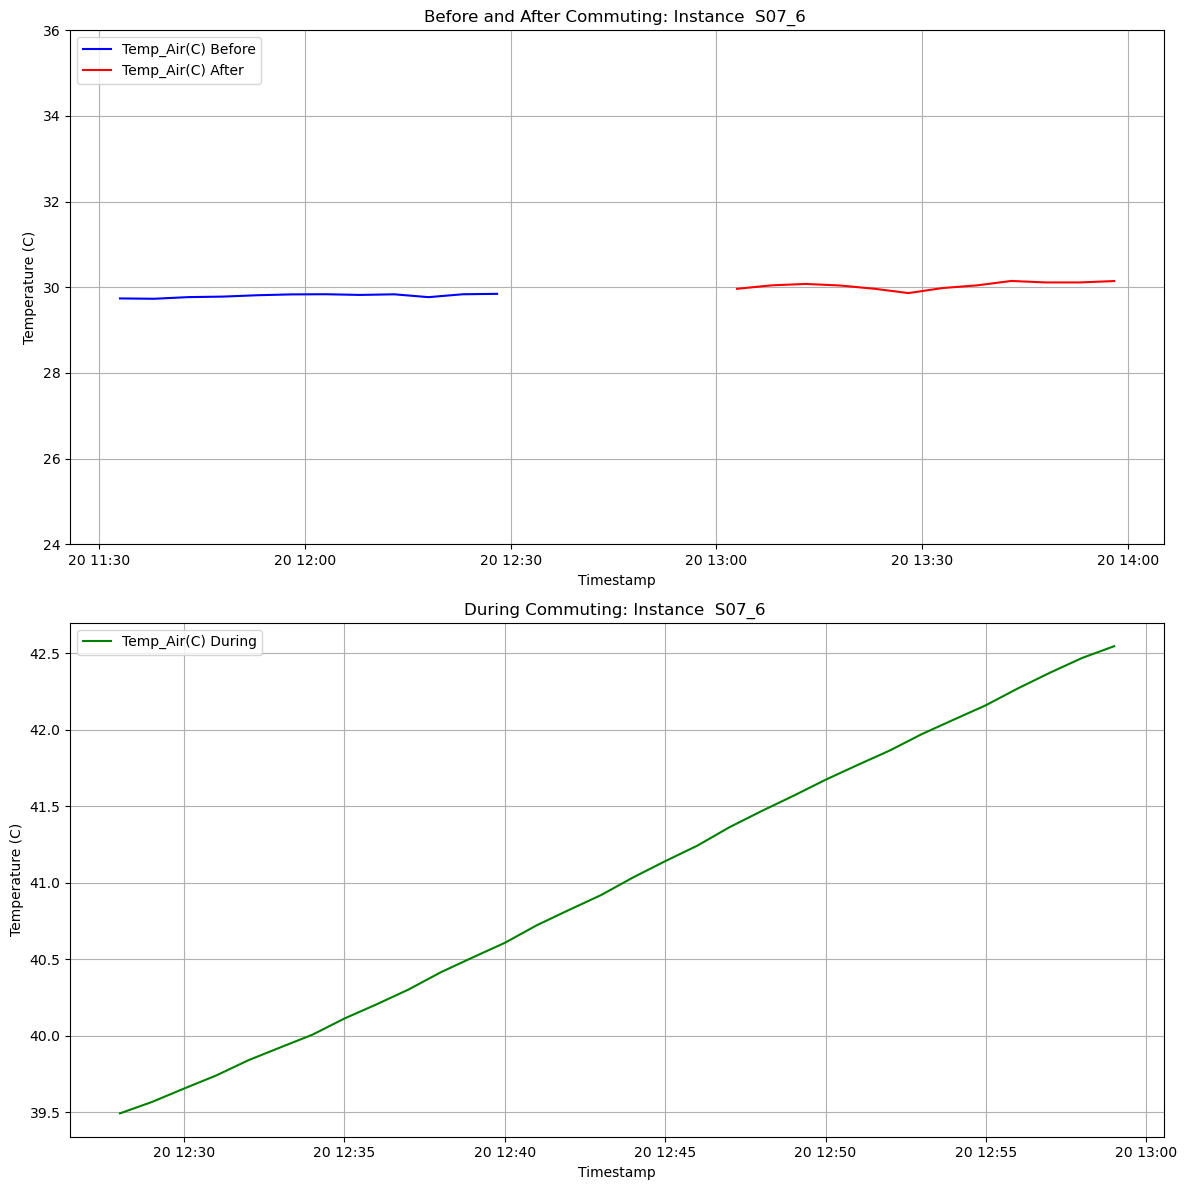

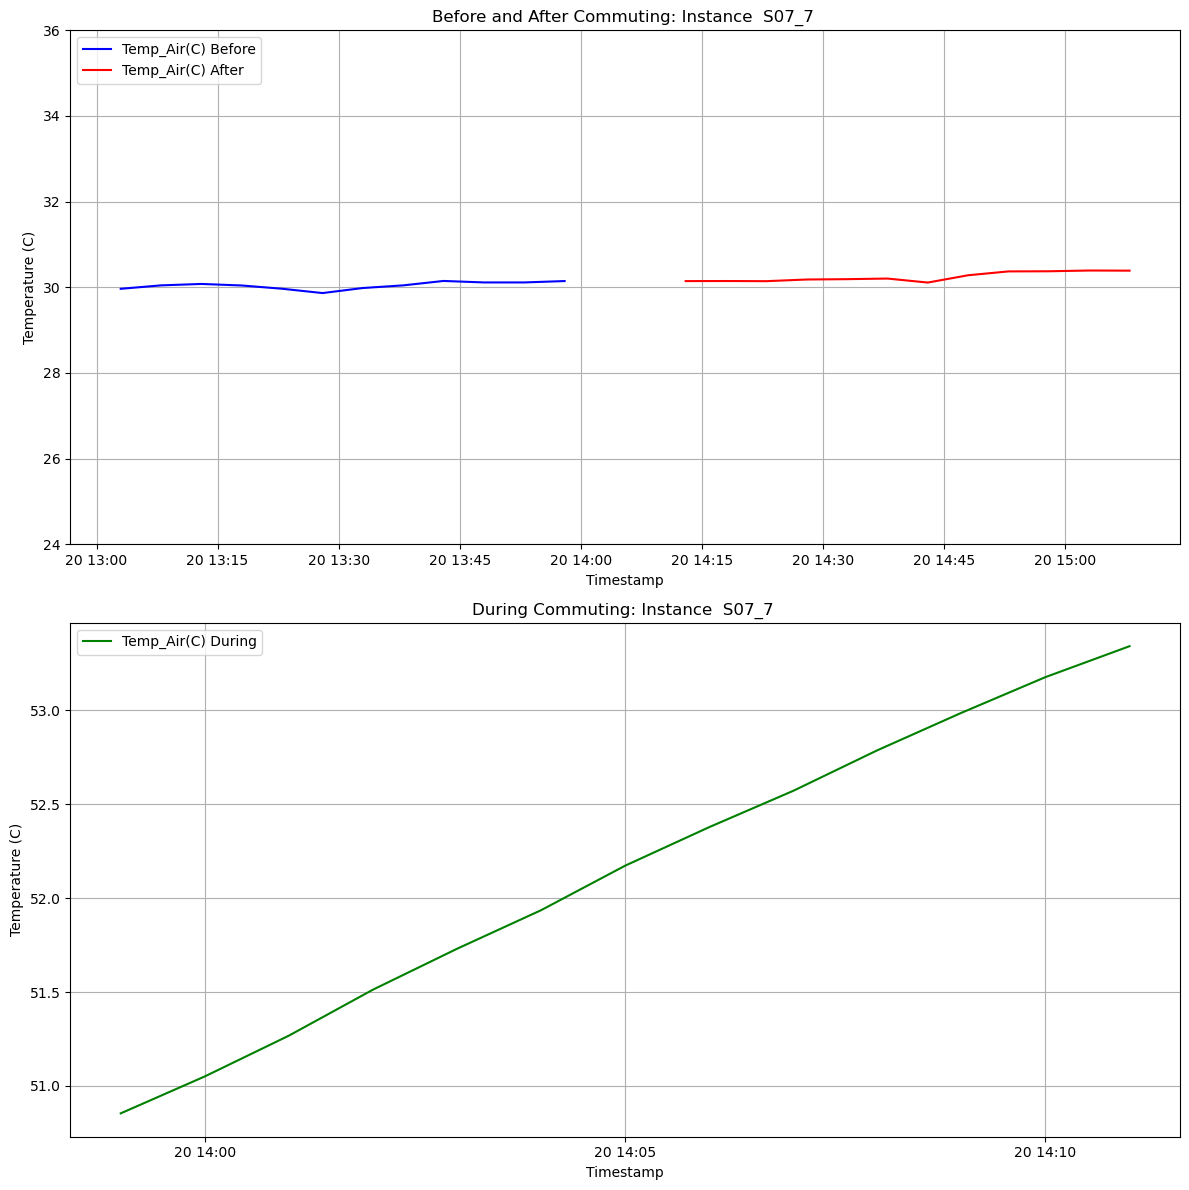

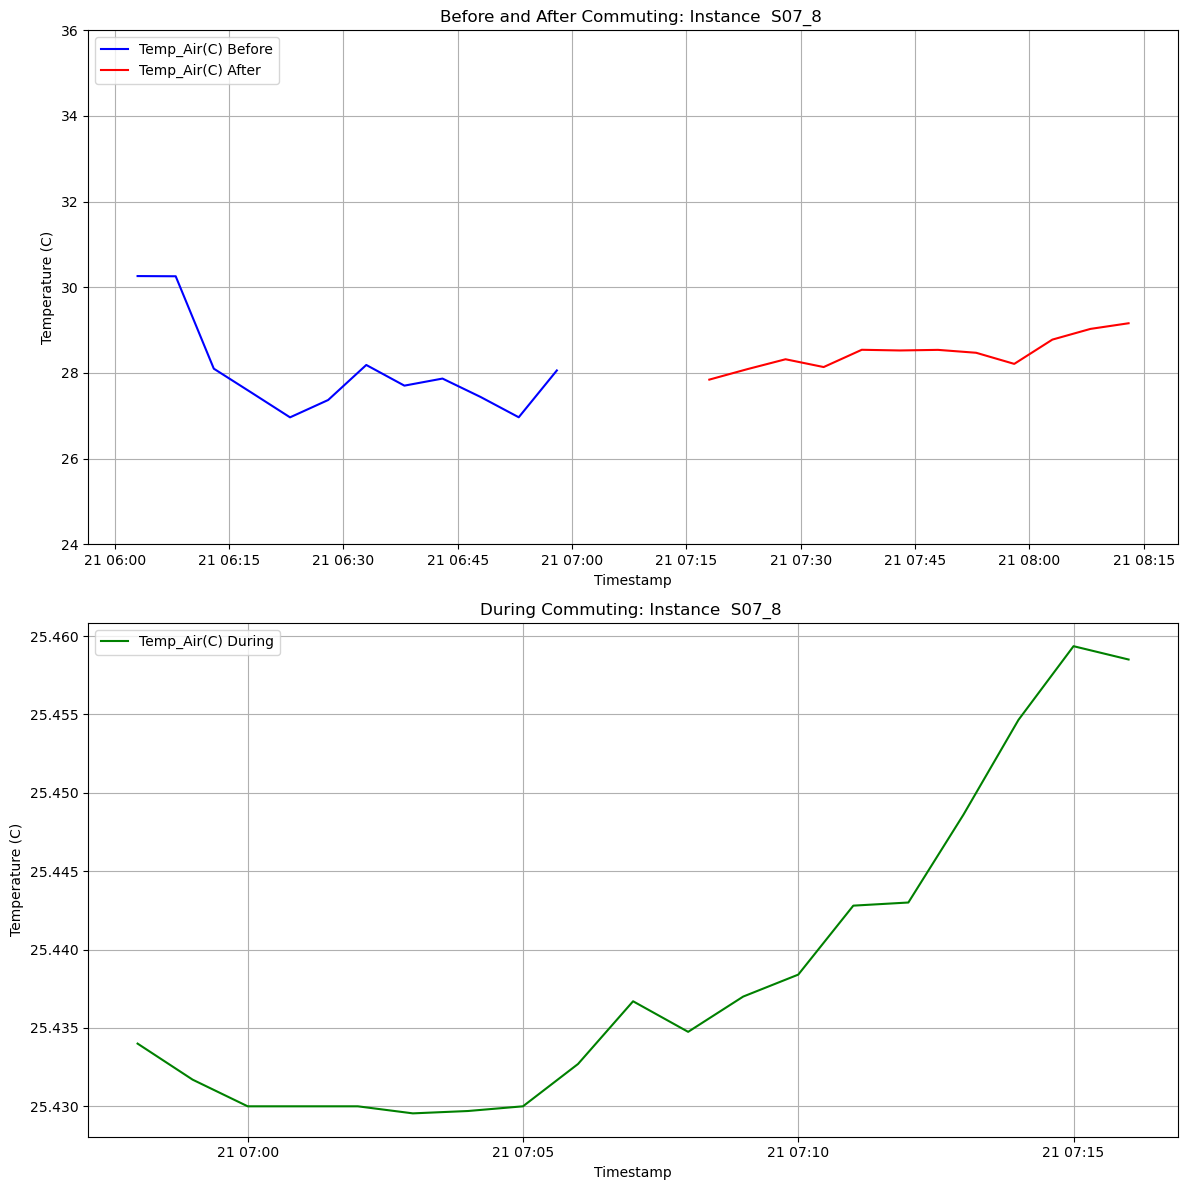

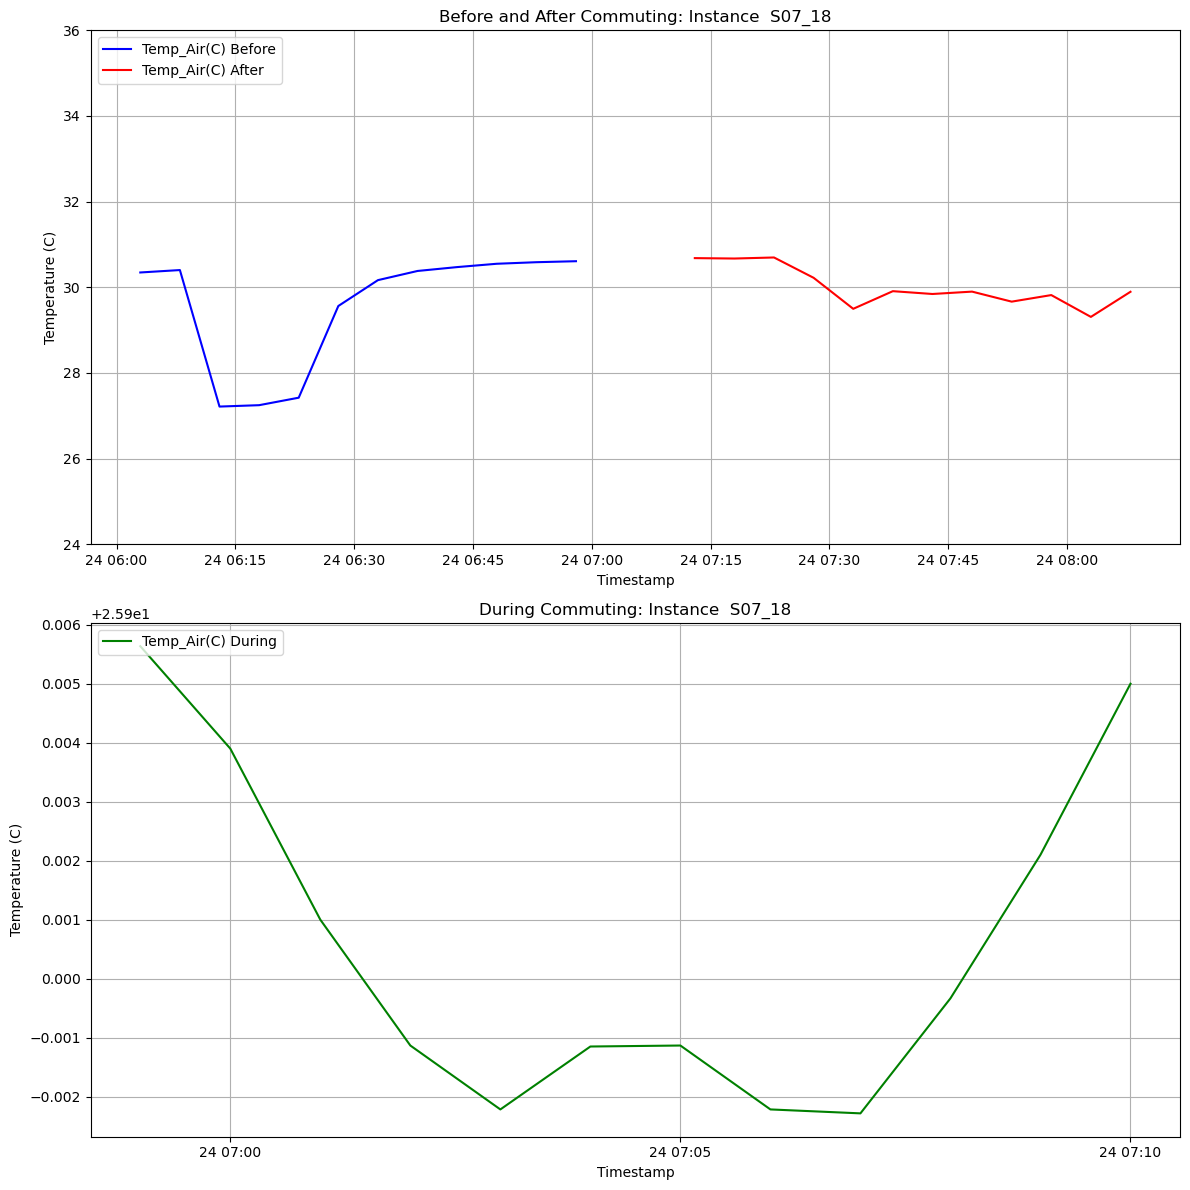

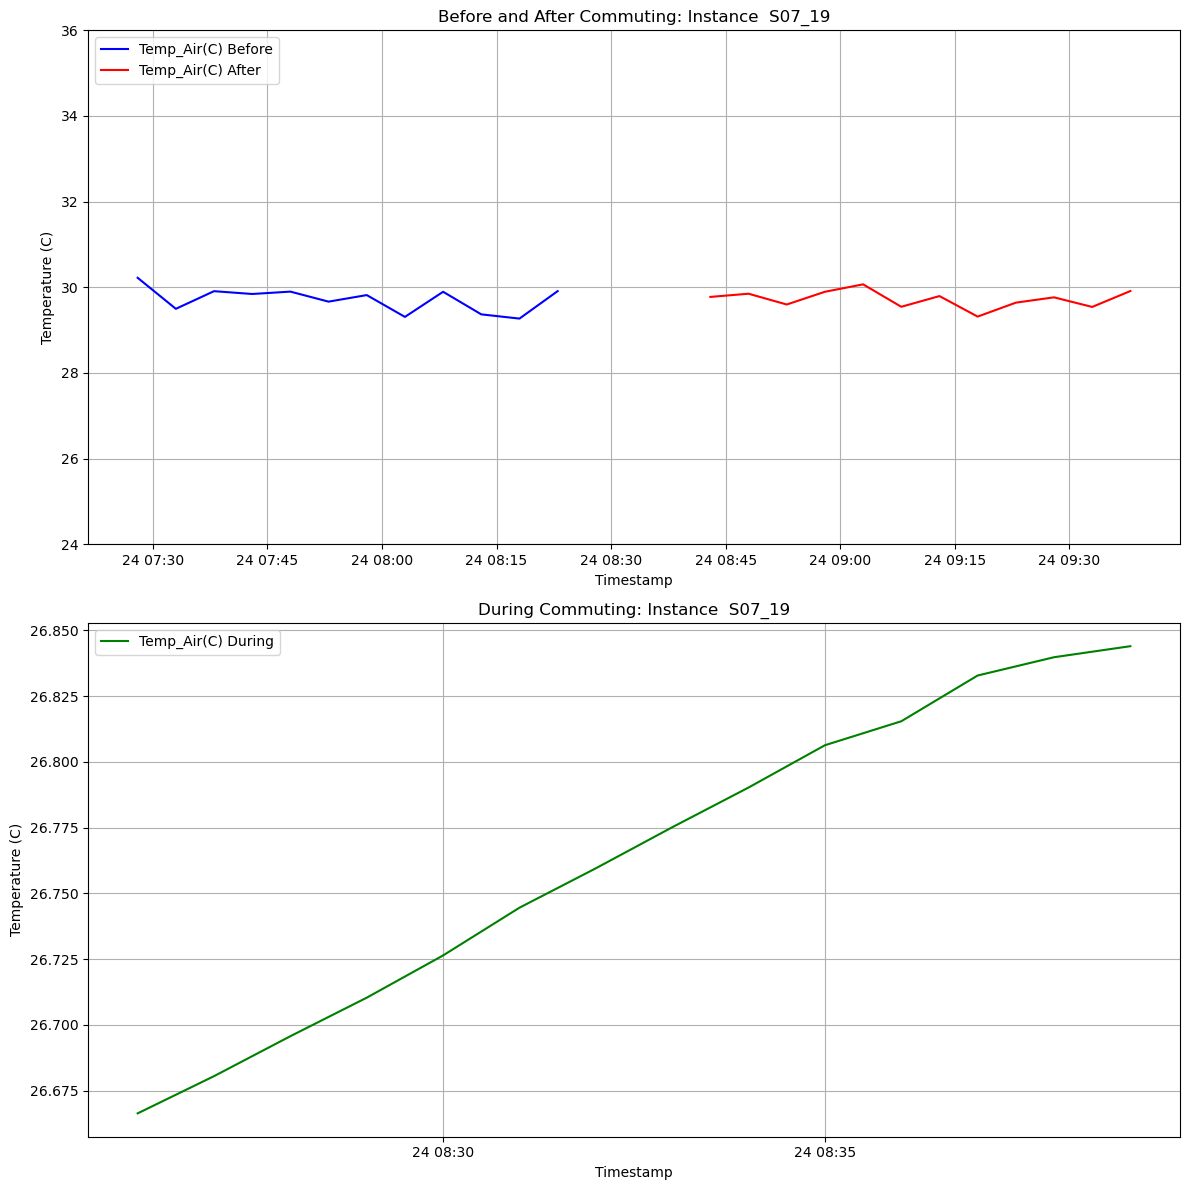

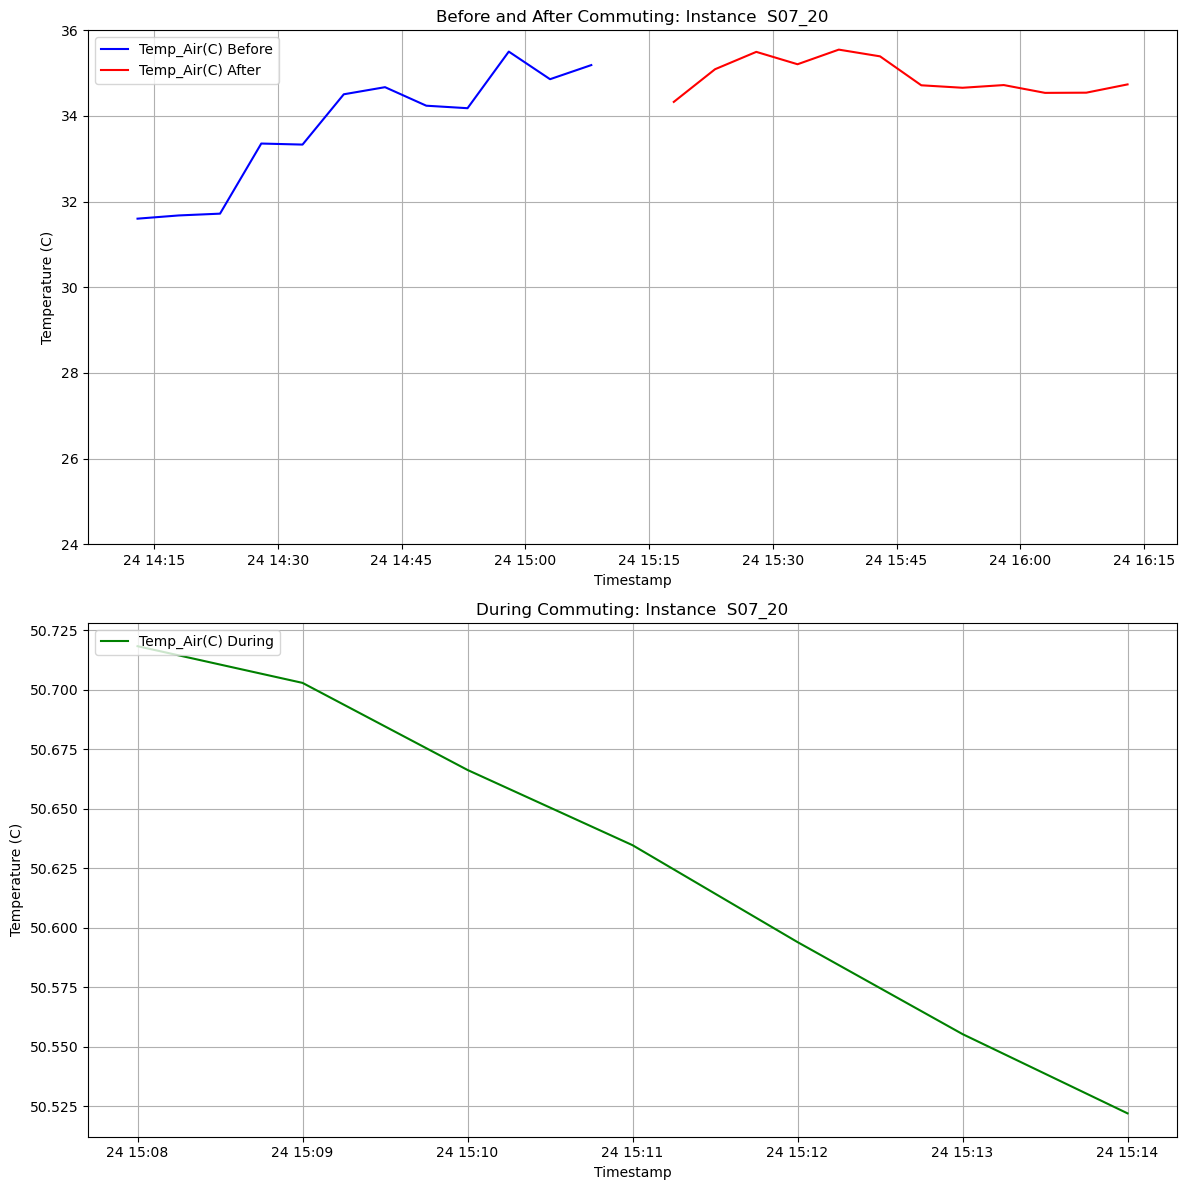

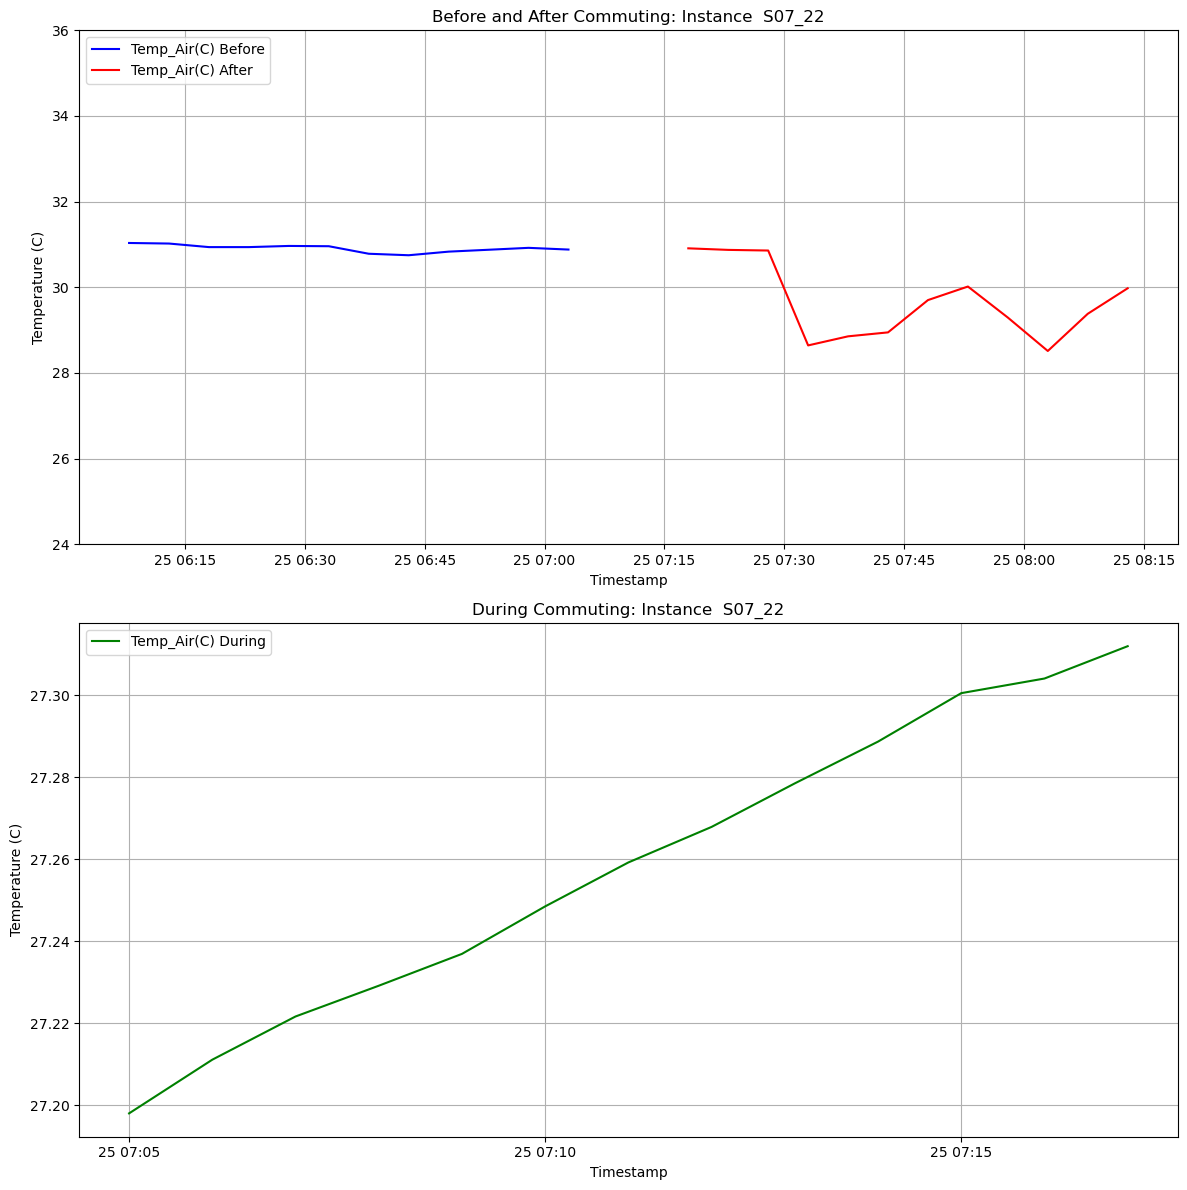

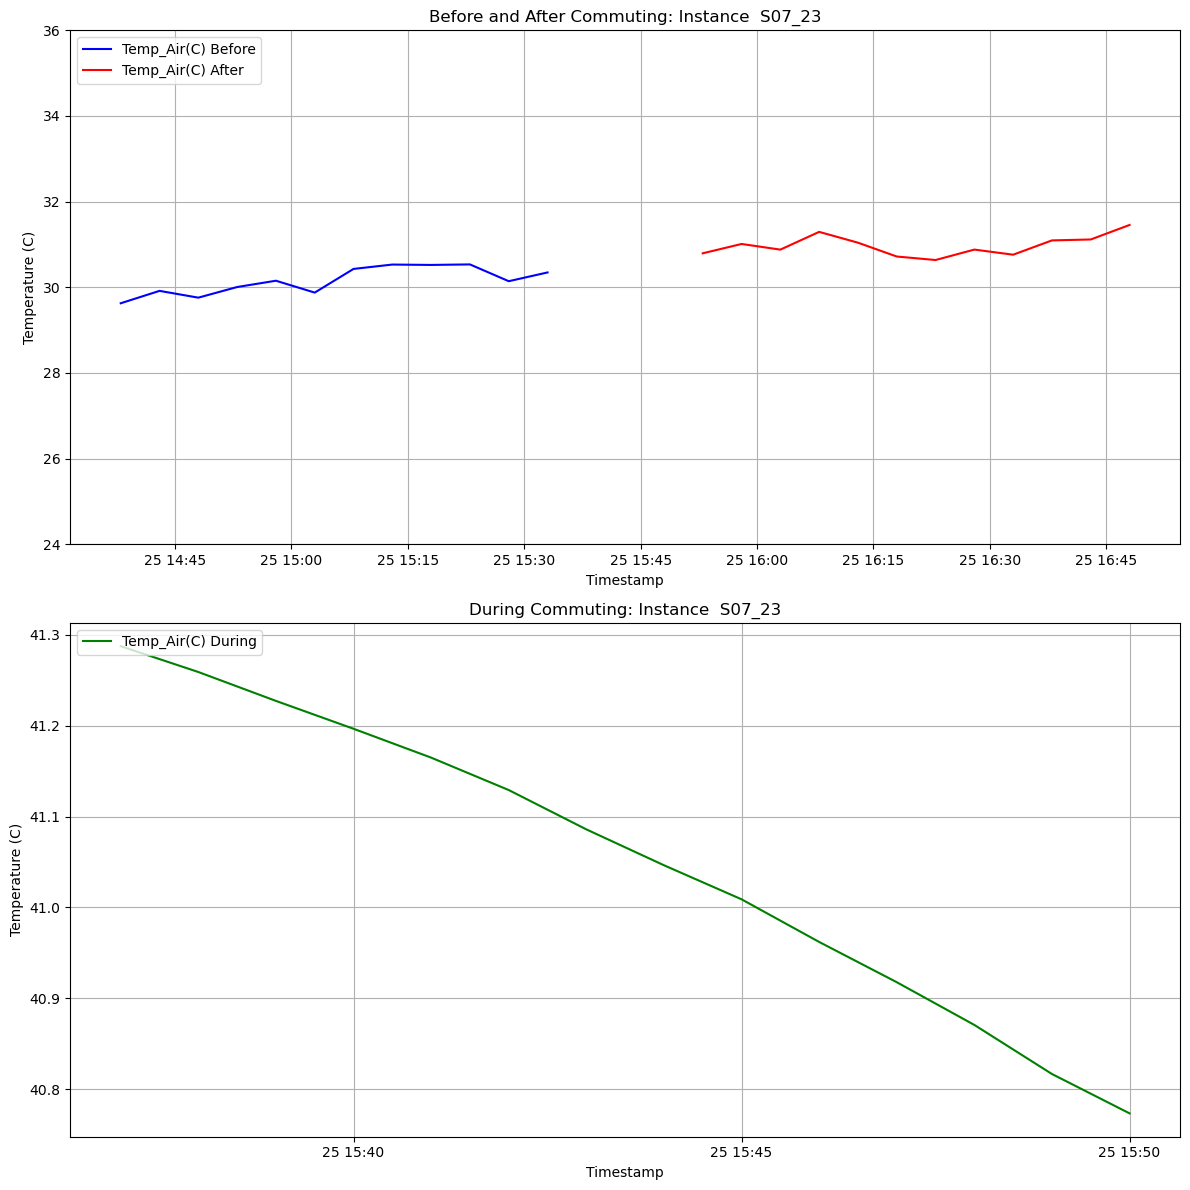

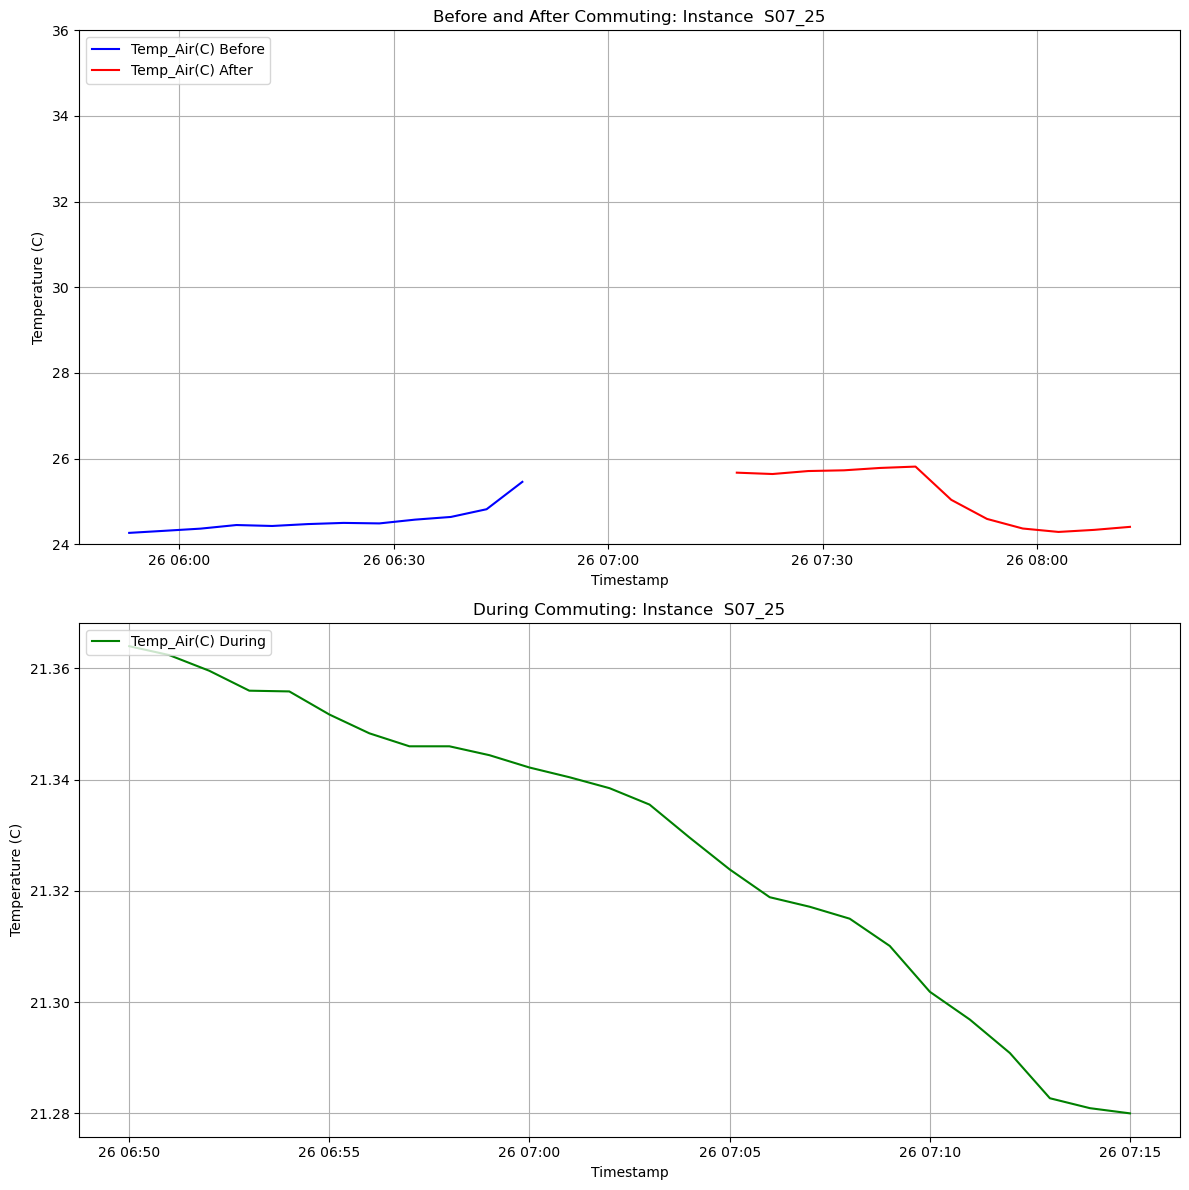

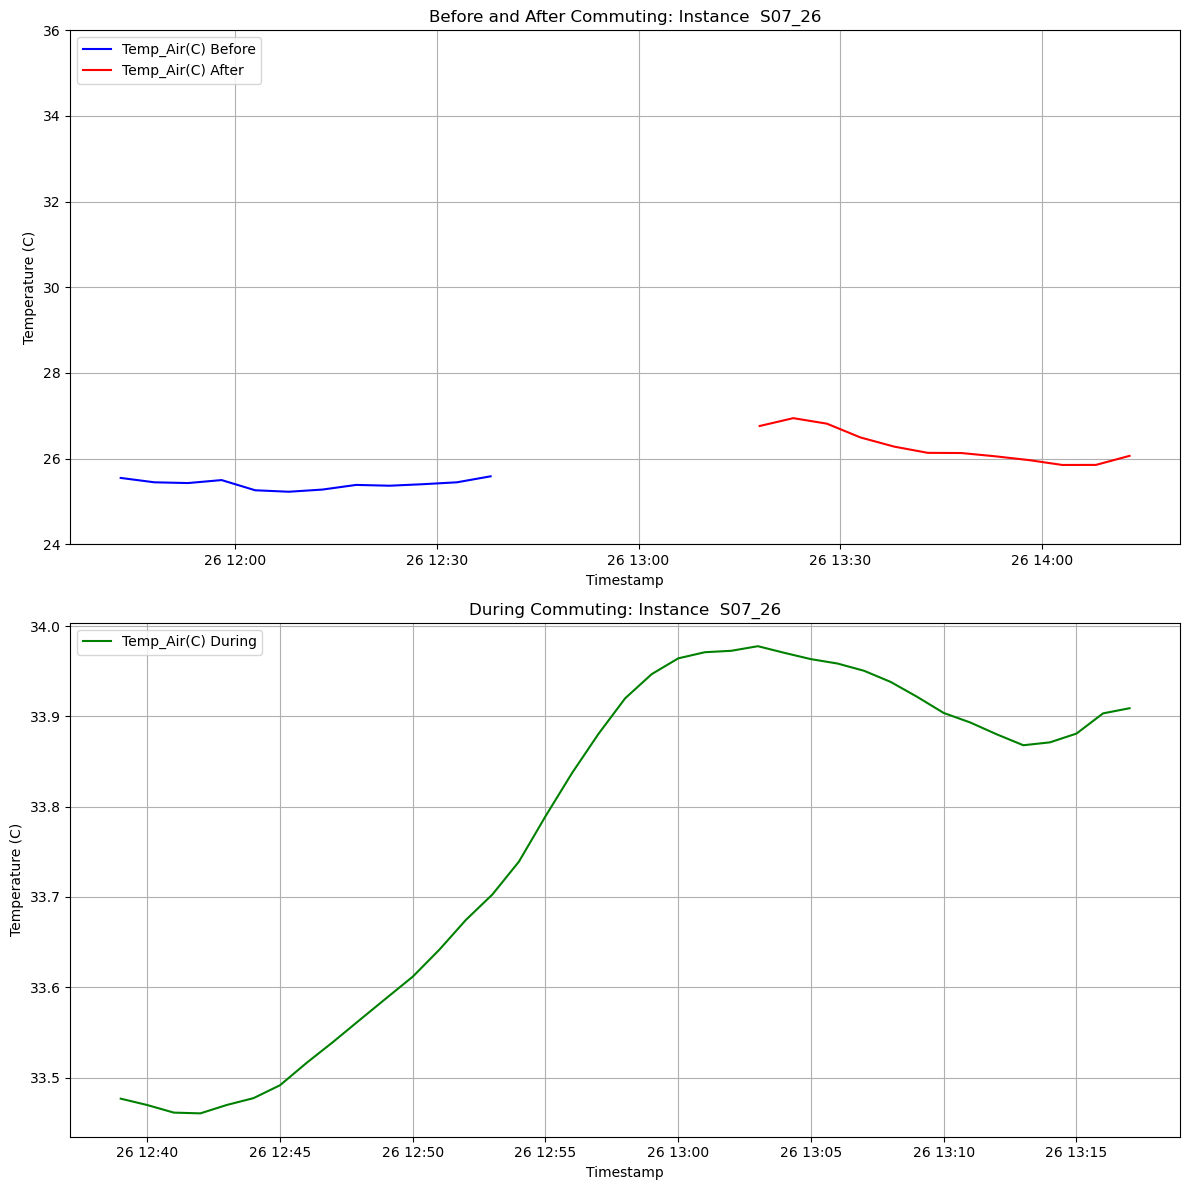

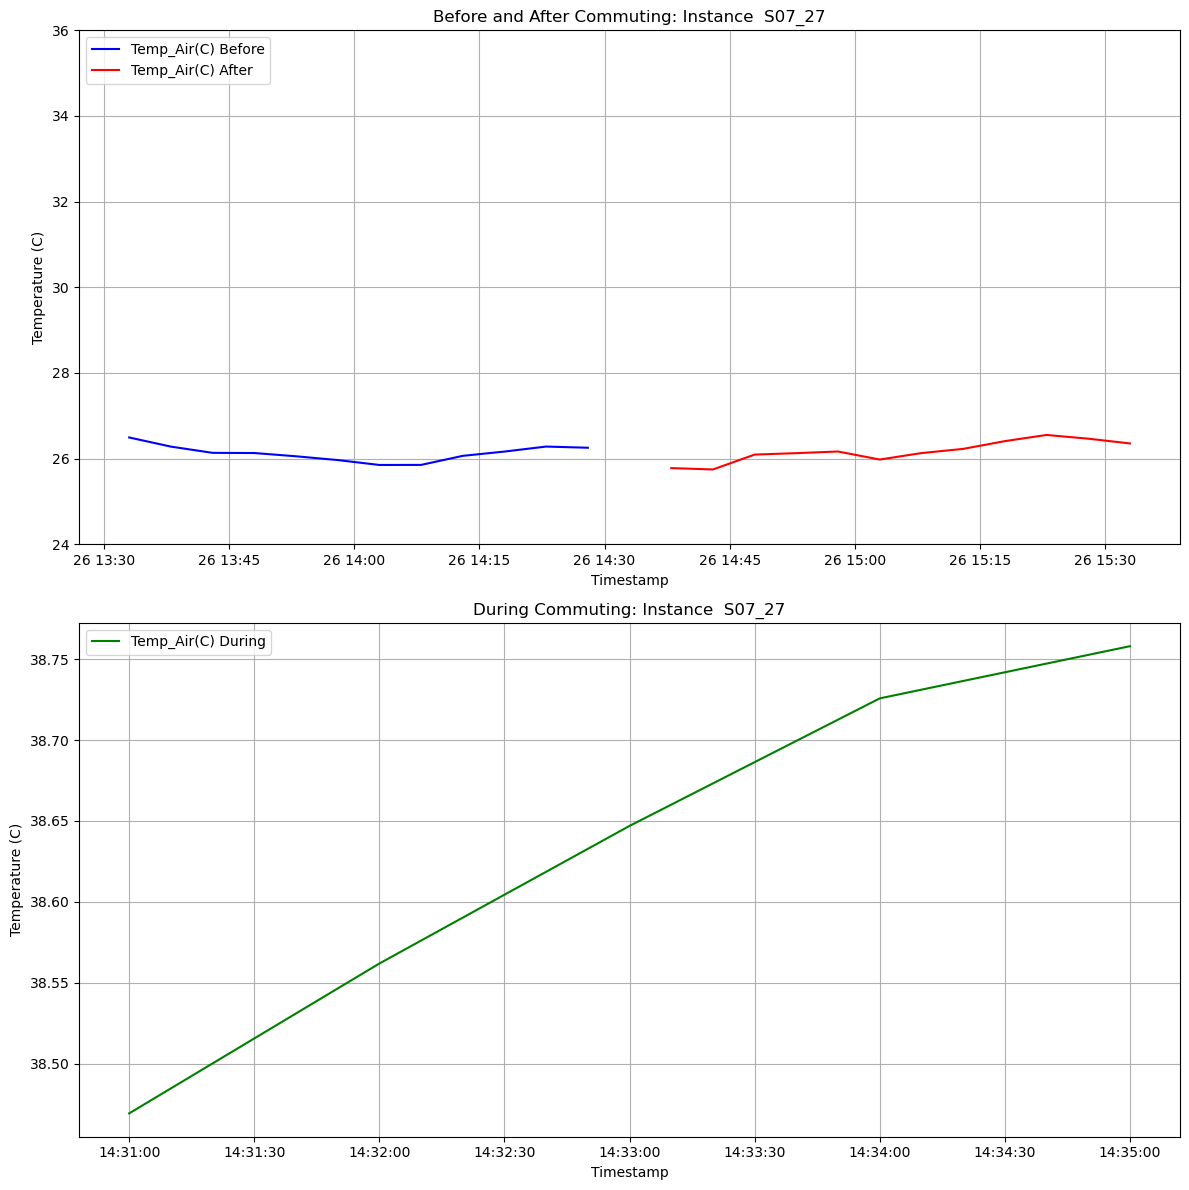

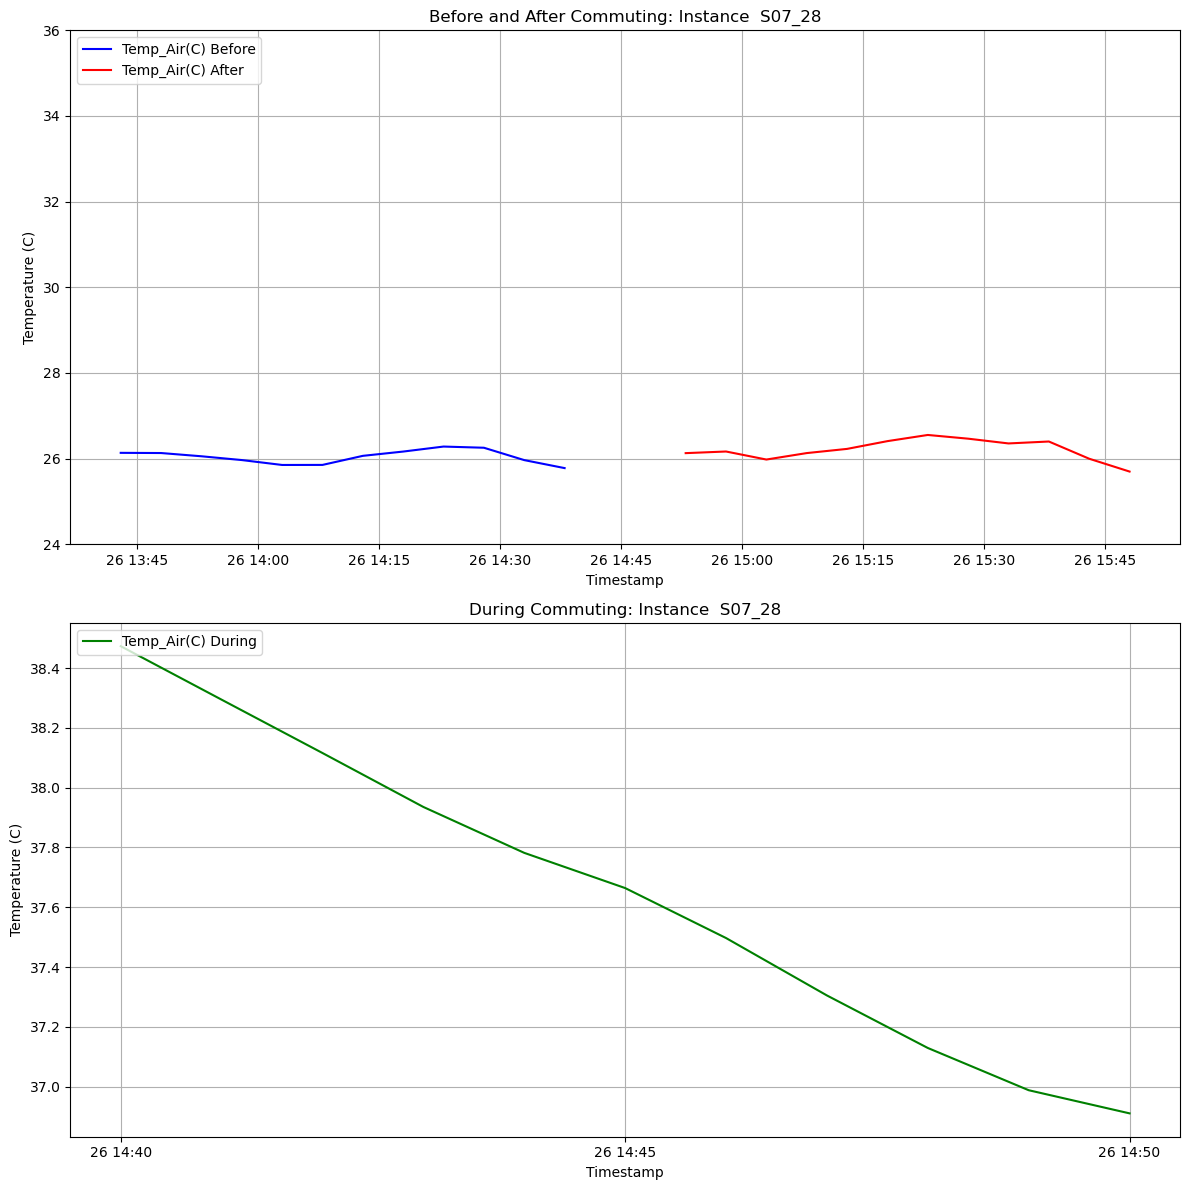

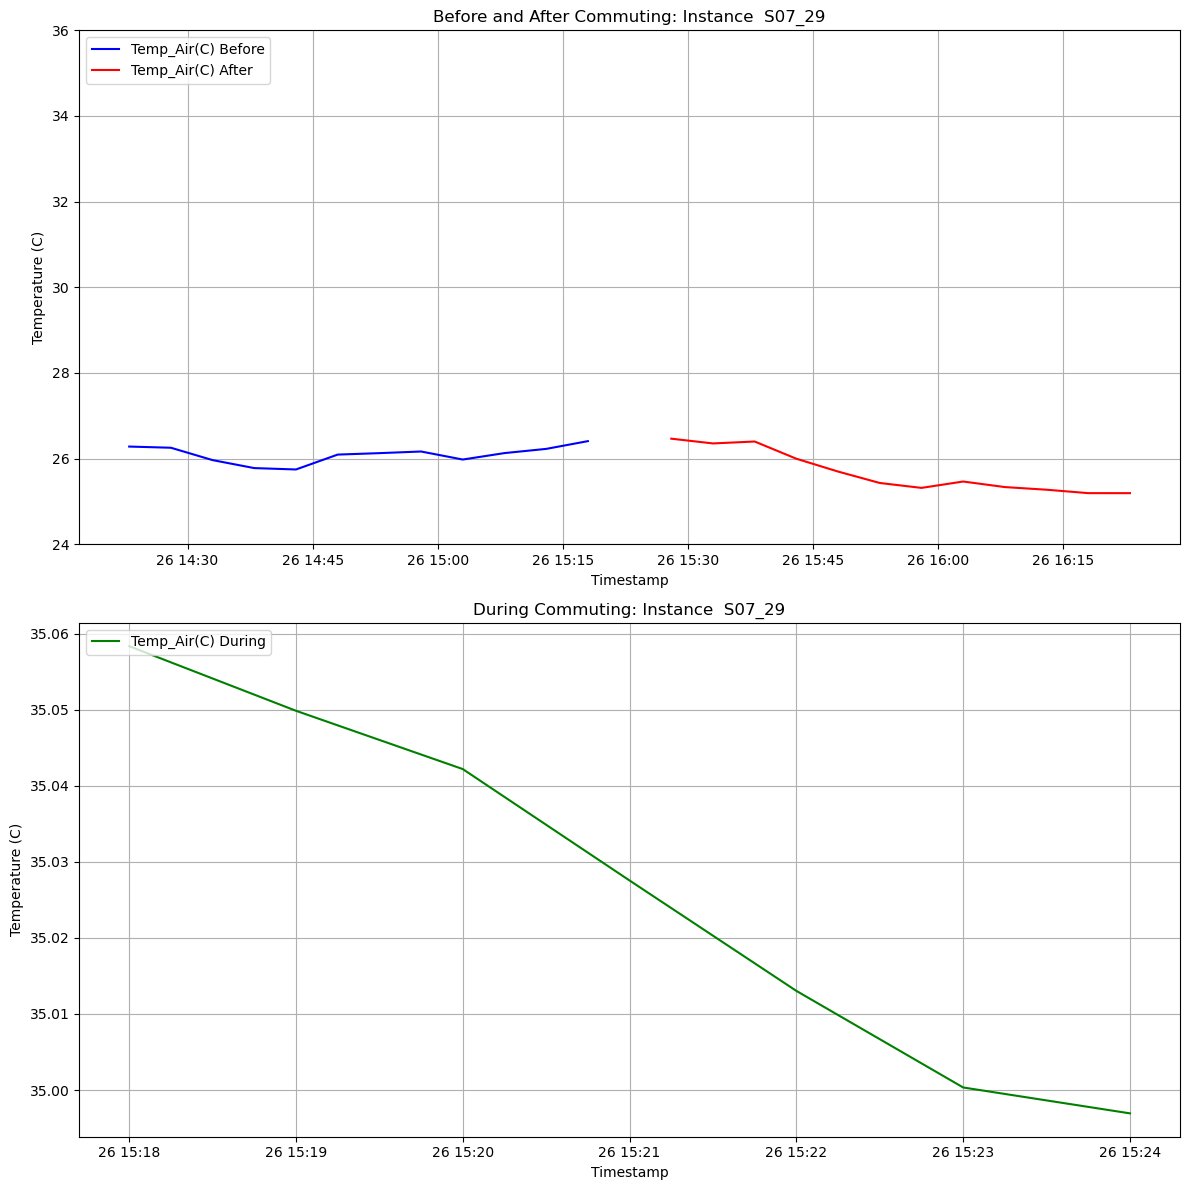

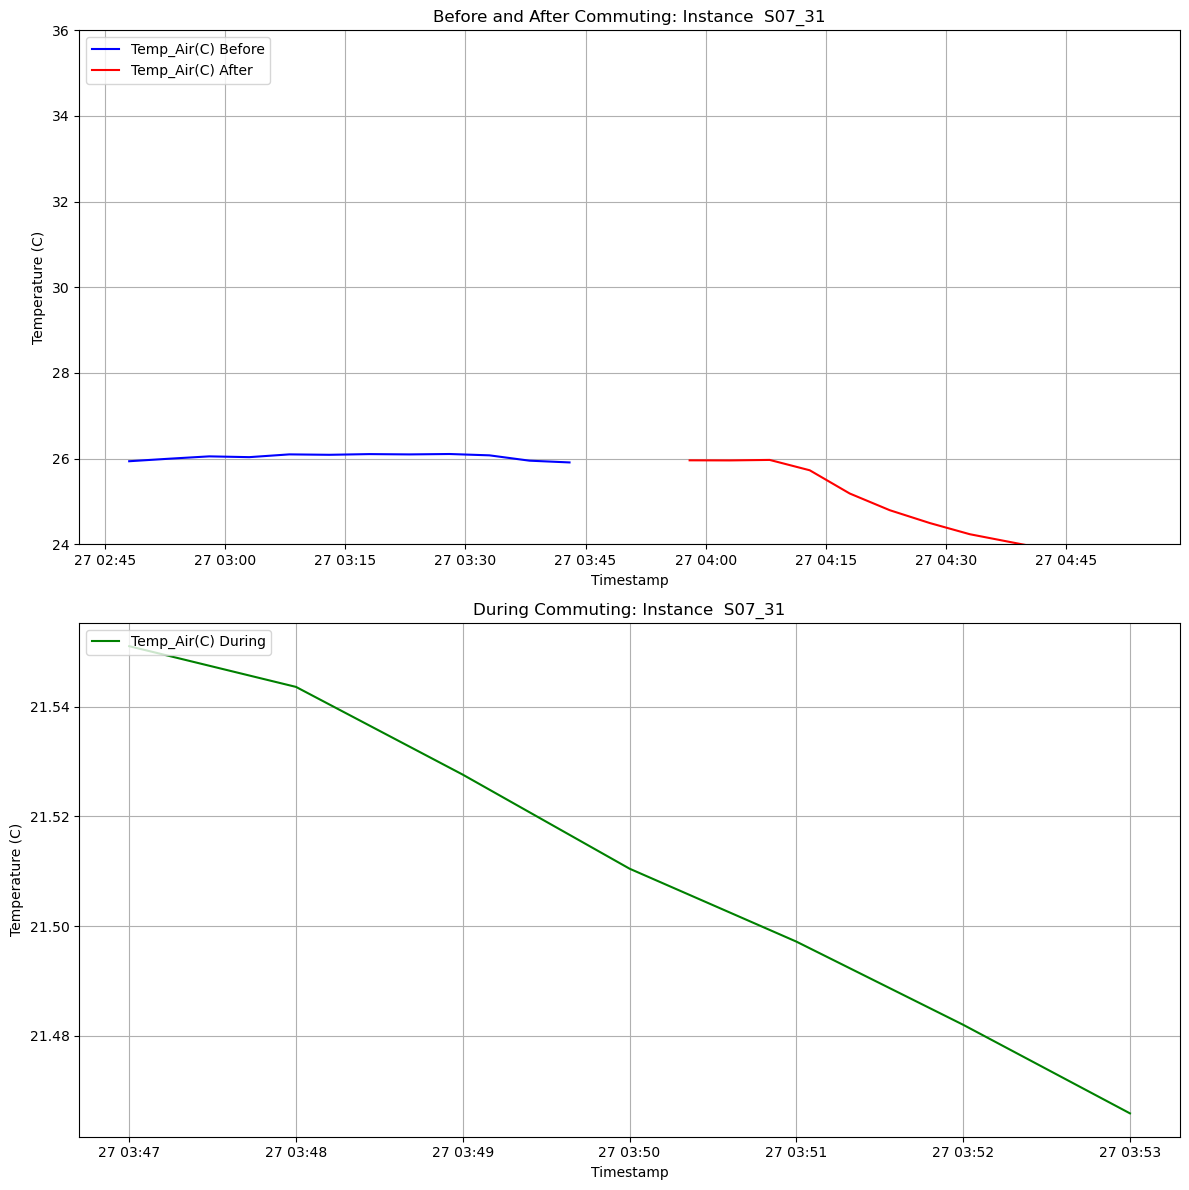

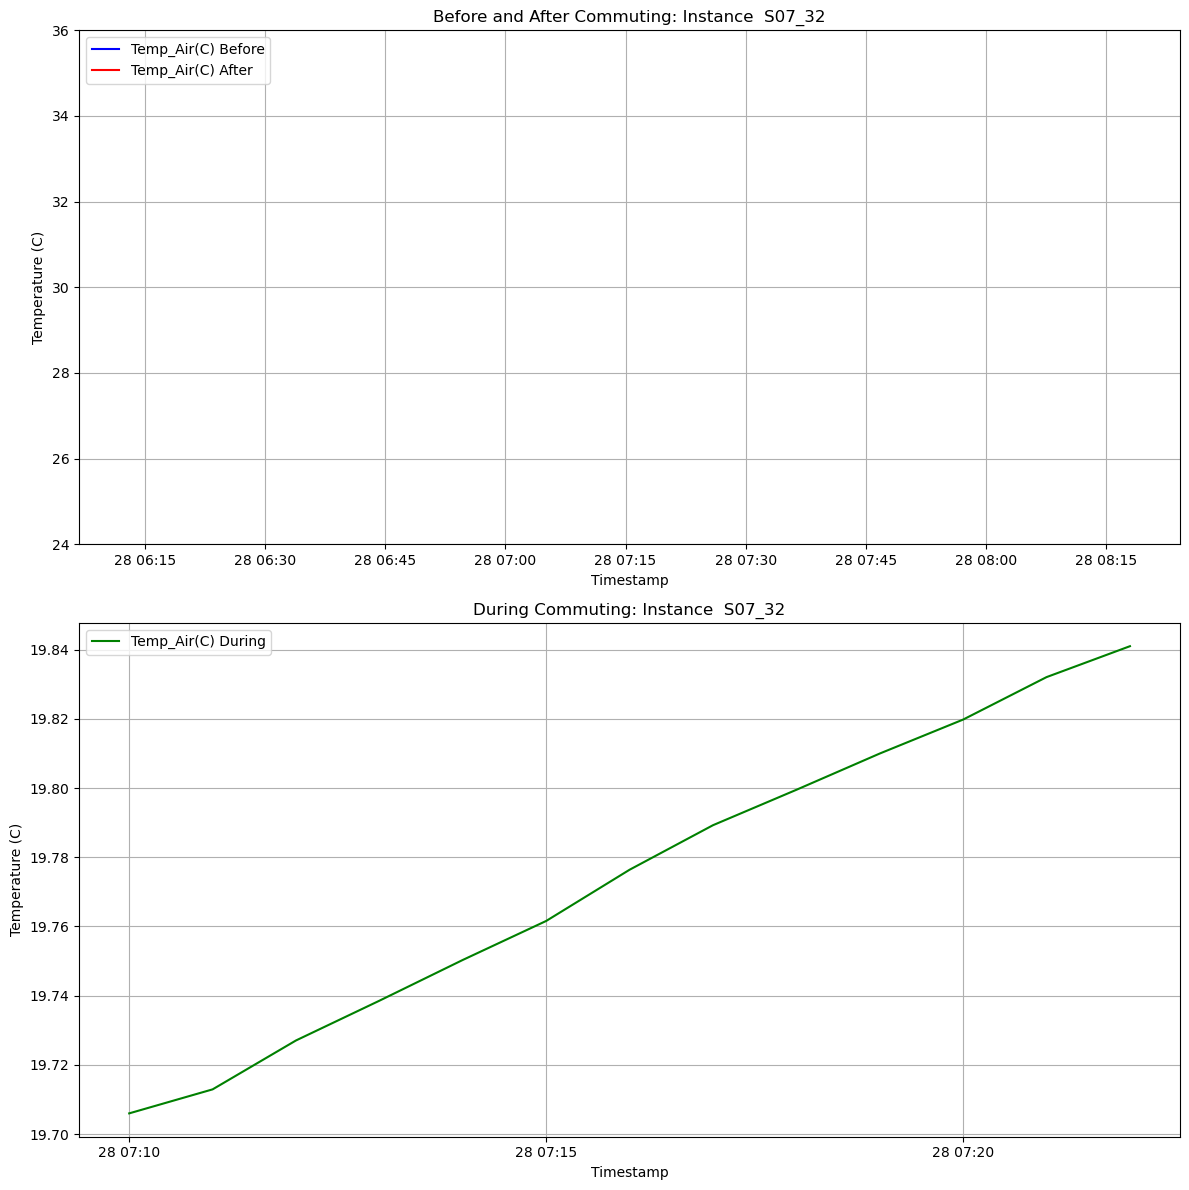

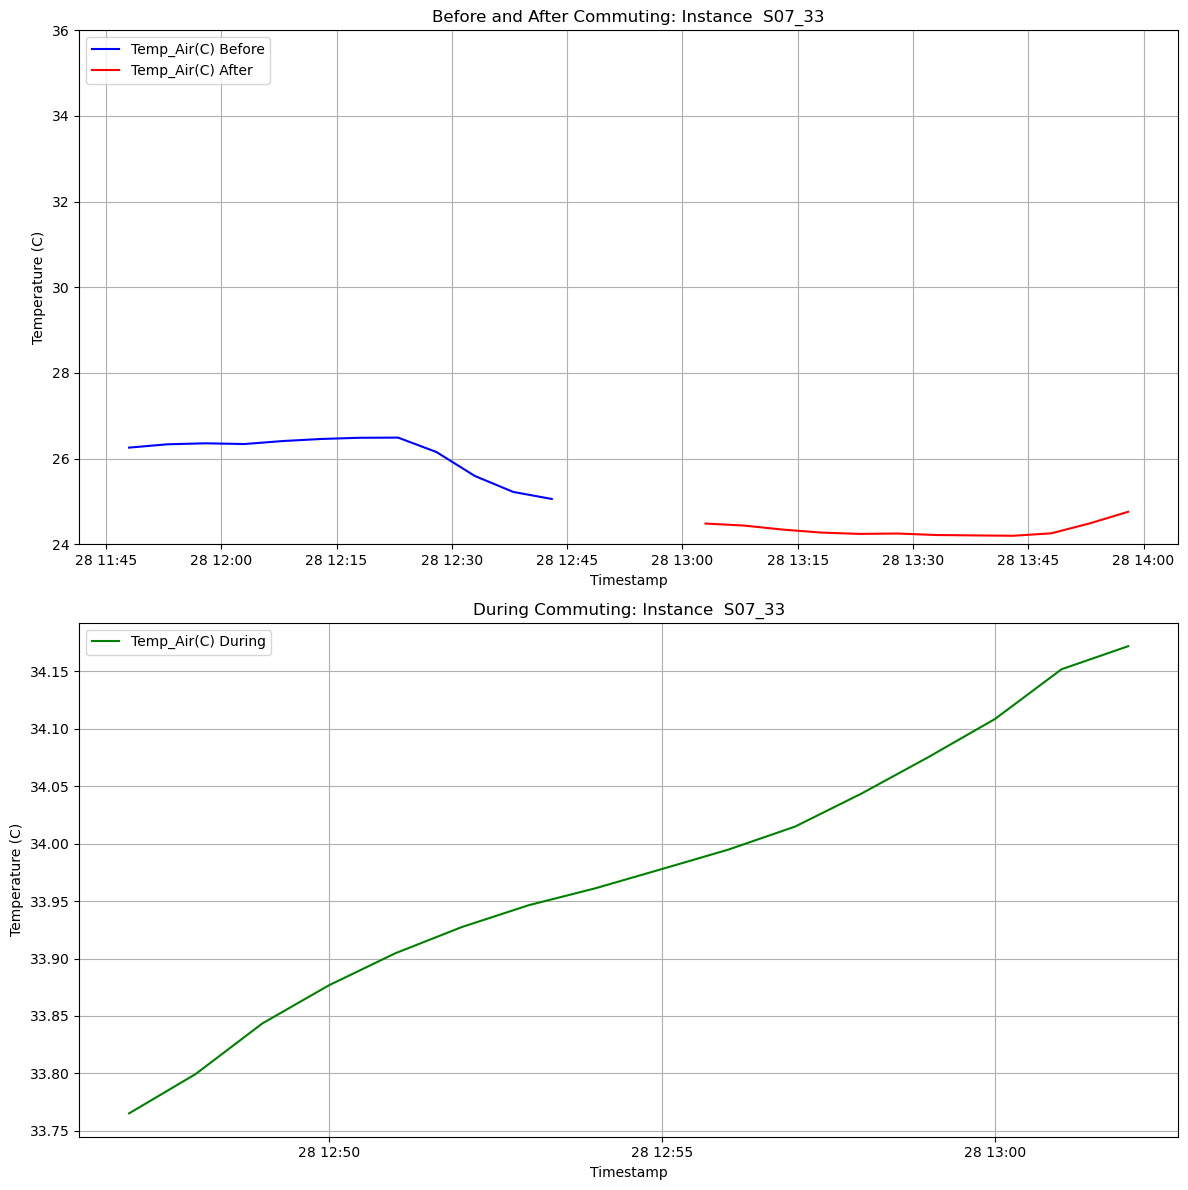

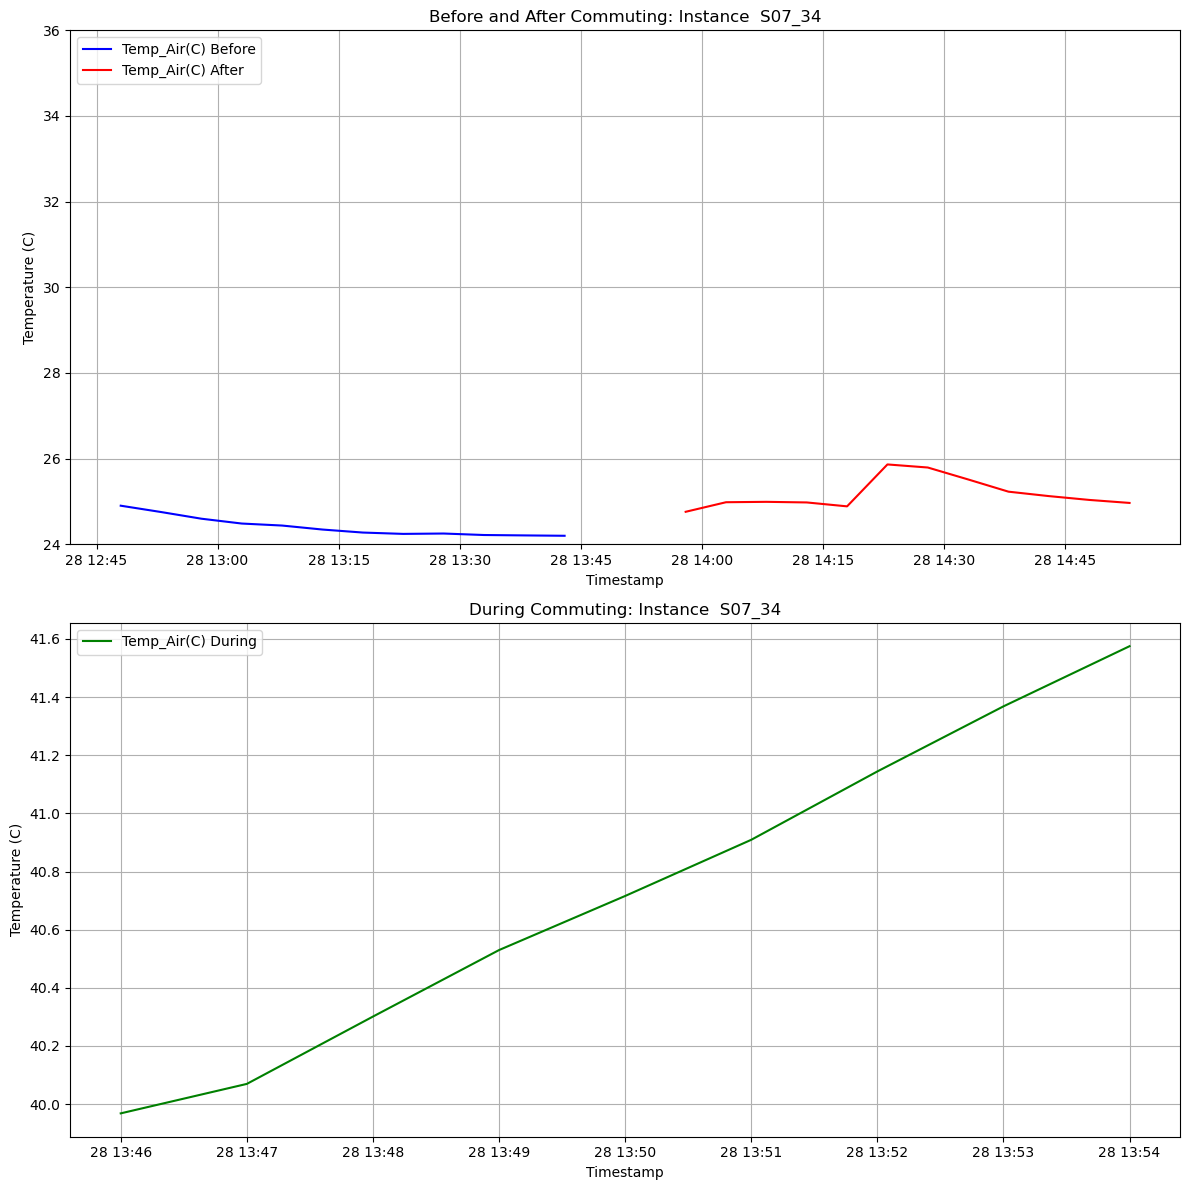

In [8]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load the CSV files
data_file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_d.csv'

data = pd.read_csv(data_file_path)
commuting_data = S07_df

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' columns to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
commuting_data['Timestamp'] = pd.to_datetime(commuting_data['DateTime'])

# Define the commuting instances from the provided markdown data
commuting_instances = [
    {"ID_instance": " S07_1 ", "Start Time": "2023-07-18 14:52:46", "End Time": "2023-07-18 15:24:35"},
    {"ID_instance": " S07_3 ", "Start Time": "2023-07-19 12:28:27", "End Time": "2023-07-19 12:34:18"},
    {"ID_instance": " S07_5 ", "Start Time": "2023-07-20 07:01:38", "End Time": "2023-07-20 07:28:26"},
    {"ID_instance": " S07_6 ", "Start Time": "2023-07-20 12:28:53", "End Time": "2023-07-20 12:59:09"},
    {"ID_instance": " S07_7 ", "Start Time": "2023-07-20 13:59:20", "End Time": "2023-07-20 14:11:11"},
    {"ID_instance": " S07_8 ", "Start Time": "2023-07-21 06:58:59", "End Time": "2023-07-21 07:16:35"},
    {"ID_instance": " S07_18", "Start Time": "2023-07-24 06:59:16", "End Time": "2023-07-24 07:10:45"},
    {"ID_instance": " S07_19", "Start Time": "2023-07-24 08:26:12", "End Time": "2023-07-24 08:39:07"},
    {"ID_instance": " S07_20", "Start Time": "2023-07-24 15:08:25", "End Time": "2023-07-24 15:14:32"},
    {"ID_instance": " S07_22", "Start Time": "2023-07-25 07:05:08", "End Time": "2023-07-25 07:17:15"},
    {"ID_instance": " S07_23", "Start Time": "2023-07-25 15:37:19", "End Time": "2023-07-25 15:50:55"},
    {"ID_instance": " S07_25", "Start Time": "2023-07-26 06:50:55", "End Time": "2023-07-26 07:15:12"},
    {"ID_instance": " S07_26", "Start Time": "2023-07-26 12:39:26", "End Time": "2023-07-26 13:17:23"},
    {"ID_instance": " S07_27", "Start Time": "2023-07-26 14:31:15", "End Time": "2023-07-26 14:35:17"},
    {"ID_instance": " S07_28", "Start Time": "2023-07-26 14:40:09", "End Time": "2023-07-26 14:50:25"},
    {"ID_instance": " S07_29", "Start Time": "2023-07-26 15:18:35", "End Time": "2023-07-26 15:24:27"},
    {"ID_instance": " S07_31", "Start Time": "2023-07-27 03:47:46", "End Time": "2023-07-27 03:53:56"},
    {"ID_instance": " S07_32", "Start Time": "2023-07-28 07:10:46", "End Time": "2023-07-28 07:22:12"},
    {"ID_instance": " S07_33", "Start Time": "2023-07-28 12:47:06", "End Time": "2023-07-28 13:02:05"},
    {"ID_instance": " S07_34", "Start Time": "2023-07-28 13:46:47", "End Time": "2023-07-28 13:54:30"}
]

# Convert string times to datetime
for instance in commuting_instances:
    instance["Start Time"] = datetime.strptime(instance["Start Time"], "%Y-%m-%d %H:%M:%S")
    instance["End Time"] = datetime.strptime(instance["End Time"], "%Y-%m-%d %H:%M:%S")

# Define y-axis limits for consistency
primary_y_axis_limits = (24, 36)

# Function to plot temperature data before, during, and after for each instance
def plot_temperatures_full(commuting_instances, data, commuting_data):
    for instance in commuting_instances:
        instance_id = instance["ID_instance"]
        start_time = instance["Start Time"]
        end_time = instance["End Time"]
        one_hour_before = start_time - timedelta(hours=1)
        one_hour_after = end_time + timedelta(hours=1)

        # Filter data for one hour before, during, and after the commuting instance
        before_data = data[(data['Timestamp'] >= one_hour_before) & (data['Timestamp'] <= start_time)]
        during_data = commuting_data[(commuting_data['Timestamp'] >= start_time) & (commuting_data['Timestamp'] <= end_time)]
        after_data = data[(data['Timestamp'] >= end_time) & (data['Timestamp'] <= one_hour_after)]

        # Resample to make smoother curves
        before_data = before_data[['Timestamp', 'Temp_Air(C)_x']].resample('min', on='Timestamp').mean().interpolate()
        during_data = during_data[['Timestamp', 'Temp(C)_N1']].resample('min', on='Timestamp').mean().interpolate()
        after_data = after_data[['Timestamp', 'Temp_Air(C)_x']].resample('min', on='Timestamp').mean().interpolate()

        # Plot the data
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

        # Plot Before and After Commuting on the first subplot
        ax1.plot(before_data.index, before_data['Temp_Air(C)_x'], label='Temp_Air(C) Before', color='blue')
        ax1.plot(after_data.index, after_data['Temp_Air(C)_x'], label='Temp_Air(C) After', color='red')
        ax1.set_ylim(primary_y_axis_limits)
        ax1.set_title(f'Before and After Commuting: Instance {instance_id}')
        ax1.set_xlabel('Timestamp')
        ax1.set_ylabel('Temperature (C)')
        ax1.legend(loc='upper left')
        ax1.grid(True)

        # Plot During Commuting on the second subplot
        ax2.plot(during_data.index, during_data['Temp(C)_N1'], label='Temp_Air(C) During', color='green')
        ax2.set_title(f'During Commuting: Instance {instance_id}')
        ax2.set_xlabel('Timestamp')
        ax2.set_ylabel('Temperature (C)')
        ax2.legend(loc='upper left')
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

# Visualize the temperature data for each commuting instance, including during commuting
plot_temperatures_full(commuting_instances, data, commuting_data)
